# Haute volatilité et haut rendement : La paire EUR/LBP

L'analyse de la Livre Libanaise apportera une perspective enrichissante sur la gestion des devises à haut risque. Elle permettra d'explorer comment les rendements élevés peuvent être réalisés tout en prenant en compte les défis posés par une forte volatilité.

Cette étude contribuera à la création d'un modèle prédictif robuste pour aider à l'élaboration de stratégies d'investissement adaptées à des marchés financiers imprévisibles.

La visualisation graphique des fluctuations de la LBP enrichira notre compréhension des dynamiques de marché et nous permettra de mieux anticiper les mouvements futurs sur une paire à risque élevé.

Cette analyse nous aidera également à comparer l'efficacité de différents modèles prédictifs selon le profil de volatilité et de rendement des devises.

## Installation des packages et importations des librairies

In [1]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=3a404eb2f0d057312bfb180e26237266b09ec2cfbf8a311c96470970c8290405
  Stored in directory: /Users/omarmorsli/Library/Caches/pip/wheels/61/d8/66/8018676d483fa5edb5337a7a25ee8c029ac255be25f90f3cd5
Successfully built ta


In [2]:
pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 933.8/933.8 kB 13.8 MB/s eta 0:00:00 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.9 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
import numpy as np
# import plotly.express as px
# import plotly.graph_objects as go
import ta
import numpy as np
# import xgboost as xgb
# from prophet import Prophet
# from arch import arch_model

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

## Importation du dataset et analyse de sa structure et des données macro

In [6]:
eurlbp_data = pd.read_csv("EURLBPX.csv")
eurlbp_data

Date          Open          High           Low         Close  \
0     2002-04-01   1324.893066   1336.161011   1321.806519   1333.373047   
1     2002-04-02           NaN           NaN           NaN           NaN   
2     2002-04-03           NaN           NaN           NaN           NaN   
3     2002-04-04           NaN           NaN           NaN           NaN   
4     2002-04-05           NaN           NaN           NaN           NaN   
...          ...           ...           ...           ...           ...   
5776  2024-05-21  97306.398438  97306.398438  97271.703125  97306.398438   
5777  2024-05-22  97271.703125  97271.703125  97010.898438  97131.000000   
5778  2024-05-23  97010.898438  97079.203125  96875.000000  97131.000000   
5779  2024-05-24  97079.203125  97079.203125  97039.296875  96875.000000   
5780  2024-05-24  96791.601563  97190.101563  96786.203125  97147.101563   

         Adj Close  Volume  
0      1333.373047     0.0  
1              NaN     NaN  
2              NaN     NaN  
3              NaN     NaN  
4              NaN     NaN  
...            ...     ...  
5776  97306.398438     0.0  
5777  97131.000000     0.0  
5778  97131.000000     0.0  
5779  96875.000000     0.0  
5780  97147.101563     0.0  

[5781 rows x 7 columns]

In [8]:
# Stats basiques
print("Nombre de lignes : {}".format(eurlbp_data.shape[0]))
print()

print("Display du dataset: ")
display(eurlbp_data.head())
print()

print("Basique stats: ")
data_desc = eurlbp_data.describe(include='all')
display(data_desc)
print()

print("Pourcentage de missing values: ")
display(100*eurlbp_data.isnull().sum()/eurlbp_data.shape[0])

Nombre de lignes : 5781

Display du dataset: 


Date         Open         High          Low        Close  \
0  2002-04-01  1324.893066  1336.161011  1321.806519  1333.373047   
1  2002-04-02          NaN          NaN          NaN          NaN   
2  2002-04-03          NaN          NaN          NaN          NaN   
3  2002-04-04          NaN          NaN          NaN          NaN   
4  2002-04-05          NaN          NaN          NaN          NaN   

     Adj Close  Volume  
0  1333.373047     0.0  
1          NaN     NaN  
2          NaN     NaN  
3          NaN     NaN  
4          NaN     NaN


Basique stats: 


Date          Open          High           Low         Close  \
count         5781   5165.000000   5165.000000   5165.000000   5165.000000   
unique        5780           NaN           NaN           NaN           NaN   
top     2024-05-24           NaN           NaN           NaN           NaN   
freq             2           NaN           NaN           NaN           NaN   
mean           NaN   3870.770373   3894.436945   3862.354100   3883.430074   
std            NaN  11271.923967  11286.039270  11257.938559  11273.474292   
min            NaN   1324.893066   1336.161011      3.000000      1.000000   
25%            NaN   1676.099976   1705.000000   1672.500000   1707.000000   
50%            NaN   1852.900024   1866.918823   1848.300049   1860.099976   
75%            NaN   2010.400024   2030.122559   2007.000000   2024.800049   
max            NaN  97954.601563  97954.601563  97941.101563  97947.796875   

           Adj Close  Volume  
count    5165.000000  5165.0  
unique           NaN     NaN  
top              NaN     NaN  
freq             NaN     NaN  
mean     3883.430074     0.0  
std     11273.474292     0.0  
min         1.000000     0.0  
25%      1707.000000     0.0  
50%      1860.099976     0.0  
75%      2024.800049     0.0  
max     97947.796875     0.0


Pourcentage de missing values: 


Date          0.000000
Open         10.655596
High         10.655596
Low          10.655596
Close        10.655596
Adj Close    10.655596
Volume       10.655596
dtype: float64

In [7]:
eurlbp_data.dropna(inplace=True)

In [8]:
# Conversion de la colonne Date en format datetime et définition comme index
eurlbp_data['Date'] = pd.to_datetime(eurlbp_data['Date'])
eurlbp_data.set_index('Date', inplace=True)

## Analyse des variables

#### 1. L'analyse des prix de cloture

 Nous analysons les prix de clôture car ils reflètent le consensus du marché sur la valeur d'un actif à la fin de chaque journée de trading.

In [11]:
# Graphique interactif des prix de clôture
fig_close = px.line(eurlbp_data, x=eurlbp_data.index, y='Close', title='Prix de clôture de la paire EUR/LBP')
fig_close.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=7, label="1w", step="day", stepmode="backward"),
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=5, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig_close.show()

La paire EUR/LBP révèle une longue période de stabilité suivie d'une hausse exponentielle après 2020, probablement due à des événements économiques majeurs.

Pour obtenir des prévisions précises, il sera essentiel de donner plus de poids aux données récentes et de normaliser les variations avec des transformations appropriées.

#### 2. L'analyse des rendements quotidiens

Nous commencerons par diviser chaque prix de clôture par le prix de clôture du jour précédent, puis appliquerons un logarithme naturel. Les rendements logarithmiques sont additifs sur le temps et tendent à être plus normalement distribués, ce qui facilite l'analyse statistique.

In [9]:
# Calcul des rendements quotidiens logarithmiques
eurlbp_data['Log Returns'] = np.log(eurlbp_data['Close'] / eurlbp_data['Close'].shift(1))

In [13]:
# Graphique interactif des rendements quotidiens
fig_returns = px.line(eurlbp_data, x=eurlbp_data.index, y='Log Returns', title='Rendements Quotidiens de la paire EUR/LBP')
fig_returns.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=7, label="1w", step="day", stepmode="backward"),
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=5, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig_returns.show()


Les rendements quotidiens  montre des périodes de faible volatilité suivies de fluctuations extrêmes, celà reflète les tendances observées dans le graphique des prix de clôture, qui révèlent une hausse dramatique après 2020.

Cette volatilité souligne l'importance d'utiliser des approches robustes capables de capturer les fluctuations rapides et les événements rares.

#### 3. Calcul des moyennes mobiles.

Le calcul des moyennes mobiles sur 3, 7, 15 et 30 jours lisse les fluctuations quotidiennes des prix de clôture, aidant à identifier les tendances sous-jacentes et à générer des signaux de trading.

* Moyenne Mobile sur 3 Jours : Capture les mouvements à très court terme, utile pour détecter des changements rapides de tendance.
* Moyenne Mobile sur 7 Jours : Fournit une vue à court terme, filtrant les fluctuations mineures pour mieux visualiser les tendances hebdomadaires.
* Moyenne Mobile sur 15 Jours : Aide à identifier les tendances à moyen terme, éliminant les bruits de marché sur une période de deux semaines.
* Moyenne Mobile sur 30 Jours : Fournit une perspective à plus long terme, aidant à lisser les fluctuations quotidiennes et à révéler les tendances sous-jacentes sur un mois.

Ces techniques combinées éliminent les bruits de marché pour fournir une vue plus claire des mouvements de prix, facilitant la prise de décisions de trading informées et l'optimisation des stratégies d'investissement.

In [10]:
# Calcul des moyennes mobiles sur 3, 7, 15 et 30 jours
eurlbp_data['3D MA'] = eurlbp_data['Close'].rolling(window=3).mean()
eurlbp_data['7D MA'] = eurlbp_data['Close'].rolling(window=7).mean()
eurlbp_data['15D MA'] = eurlbp_data['Close'].rolling(window=15).mean()
eurlbp_data['30D MA'] = eurlbp_data['Close'].rolling(window=30).mean()

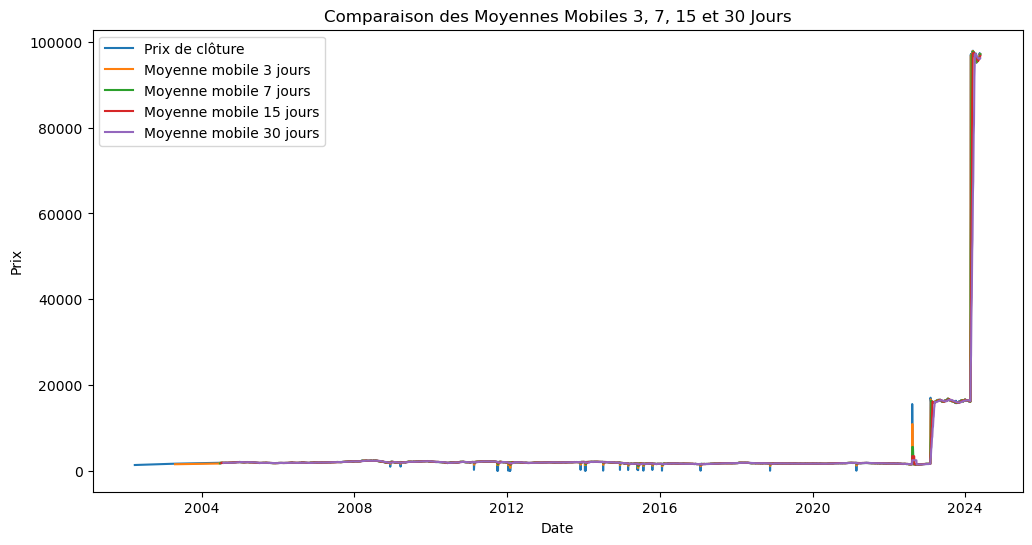

In [15]:
# Visualisation des moyennes mobiles
plt.figure(figsize=(12, 6))
plt.plot(eurlbp_data['Close'], label='Prix de clôture')
plt.plot(eurlbp_data['3D MA'], label='Moyenne mobile 3 jours')
plt.plot(eurlbp_data['7D MA'], label='Moyenne mobile 7 jours')
plt.plot(eurlbp_data['15D MA'], label='Moyenne mobile 15 jours')
plt.plot(eurlbp_data['30D MA'], label='Moyenne mobile 30 jours')
plt.title('Comparaison des Moyennes Mobiles 3, 7, 15 et 30 Jours')
plt.xlabel('Date')
plt.ylabel('Prix')
plt.legend()
plt.show()

Moyenne Mobile sur 3 Jours :
* Réagit très rapidement aux fluctuations de prix.
* Peut introduire trop de bruit, rendant difficile l'identification des tendances réelles, surtout avec des données très volatiles.

Moyenne Mobile sur 7 Jours :
* Réagit rapidement tout en offrant un certain lissage.
* Compromis entre réactivité rapide et réduction du bruit.

Moyenne Mobile sur 15 Jours :
* Bon équilibre entre réactivité et lissage des données.
* Suffisamment sensible pour capter les tendances récentes sans trop de bruit.

Moyenne Mobile sur 30 Jours :
* Fournit un lissage important, réduisant les fluctuations quotidiennes.
* Réagit plus lentement aux changements soudains, utile pour détecter des tendances à long terme.

Conclusion

Pour la paire EUR/LBP, nous utilisation la moyenne mobile sur 7 jours pour une réactivité rapide aux fluctuations récentes, et la moyenne mobile sur 15 jours pour une analyse équilibrée à moyen terme.


#### 4. Calcul des bandes de Bollinger

Nous avons conclu que les moyennes mobiles sur 7 et 15 jours étaient les plus adaptées pour capturer les tendances récentes et les fluctuations du marché. Le calcul des bandes de Bollinger autour de ces moyennes mobiles nous permet de visualiser la volatilité et d'identifier les niveaux de surachat et de survente.

Les bandes de Bollinger sont un indicateur technique composé d'une moyenne mobile centrale, entourée de deux bandes situées à une distance égale de l'écart-type multiplié par un facteur constant, généralement 2.

In [11]:
# Calcul des bandes de Bollinger pour la moyenne mobile sur 7 jours
eurlbp_data['Bollinger High 7D'] = eurlbp_data['7D MA'] + (eurlbp_data['Close'].rolling(window=7).std() * 2)
eurlbp_data['Bollinger Low 7D'] = eurlbp_data['7D MA'] - (eurlbp_data['Close'].rolling(window=7).std() * 2)

# Calcul des bandes de Bollinger pour la moyenne mobile sur 15 jours
eurlbp_data['Bollinger High 15D'] = eurlbp_data['15D MA'] + (eurlbp_data['Close'].rolling(window=15).std() * 2)
eurlbp_data['Bollinger Low 15D'] = eurlbp_data['15D MA'] - (eurlbp_data['Close'].rolling(window=15).std() * 2)

In [17]:
# Graphique interactif des prix de clôture avec moyenne mobile et bandes de Bollinger
fig_bollinger = go.Figure()

# Prix de clôture
fig_bollinger.add_trace(go.Scatter(x=eurlbp_data.index, y=eurlbp_data['Close'], mode='lines', name='Prix de clôture'))

# Moyennes mobiles
fig_bollinger.add_trace(go.Scatter(x=eurlbp_data.index, y=eurlbp_data['7D MA'], mode='lines', name='Moyenne mobile 7 jours'))
fig_bollinger.add_trace(go.Scatter(x=eurlbp_data.index, y=eurlbp_data['15D MA'], mode='lines', name='Moyenne mobile 15 jours'))

# Bandes de Bollinger 7 jours
fig_bollinger.add_trace(go.Scatter(x=eurlbp_data.index, y=eurlbp_data['Bollinger High 7D'], mode='lines', name='Bollinger High 7 jours', line=dict(dash='dash')))
fig_bollinger.add_trace(go.Scatter(x=eurlbp_data.index, y=eurlbp_data['Bollinger Low 7D'], mode='lines', name='Bollinger Low 7 jours', line=dict(dash='dash')))

# Bandes de Bollinger 15 jours
fig_bollinger.add_trace(go.Scatter(x=eurlbp_data.index, y=eurlbp_data['Bollinger High 15D'], mode='lines', name='Bollinger High 15 jours', line=dict(dash='dot')))
fig_bollinger.add_trace(go.Scatter(x=eurlbp_data.index, y=eurlbp_data['Bollinger Low 15D'], mode='lines', name='Bollinger Low 15 jours', line=dict(dash='dot')))

# Mise à jour des axes et de la mise en page
fig_bollinger.update_layout(
    title='Bandes de Bollinger de la paire EUR/LBP',
    xaxis_title='Date',
    yaxis_title='Prix'
)
fig_bollinger.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=7, label="1w", step="day", stepmode="backward"),
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=5, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig_bollinger.show()

La paire EUR/LBP a connu plusieurs périodes de survente, notamment en mars et avril 2024, signalant des opportunités d'achat.Les occurrences de surachat sont rares, ce qui suggère une pression d'achat modérée.

Ces informations, observées lors des pics de volatilité récents, sont essentielles pour améliorer la précision et la robustesse de nos modèles de prévision.

#### 5.Calcul L'indice de force relative (RSI)

L'indice de force relative (RSI) est un indicateur technique utilisé pour évaluer la force et la vitesse des mouvements de prix en comparant les hausses récentes des cours aux baisses récentes:

* Un RSI au-dessus de 70 indique une situation de surachat.
* Un RSI en dessous de 30 indique une situation de survente.

In [12]:
# Calcul du RSI (Relative Strength Index)
eurlbp_data['RSI'] = ta.momentum.rsi(eurlbp_data['Close'], window=14)

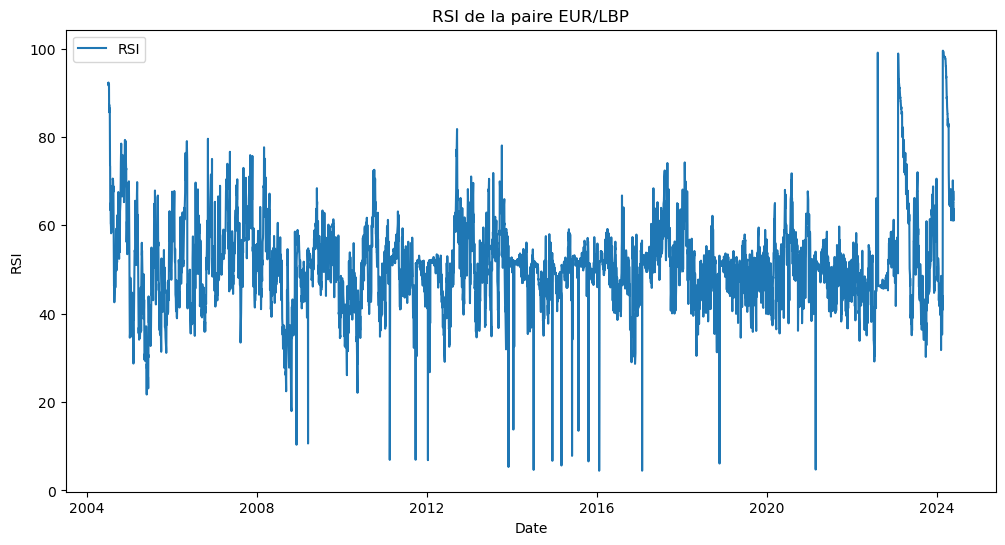

In [19]:
# Visualisation du RSI
plt.figure(figsize=(12, 6))
plt.plot(eurlbp_data['RSI'], label='RSI')
plt.title('RSI de la paire EUR/LBP')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

La paire EUR/LBP montre des périodes de surachat  et de revente relativement fréquente.  En 2023-2024, la volatilité accrue indique une pression d'achat élevée aux détriment des ventes.

L'utilisation du RSI avec les moyennes mobiles et les bandes de Bollinger nous permettent de bien identifier les points d'entrée (RSI < 30) et de sortie (RSI > 70). (Par exemple, les bandes de Bollinger ont montré des périodes de survente en mars et avril 2024, confirmées par des RSI bas, signalant des opportunités d'achat.)

Ces combinaisons d'indicateurs aideront à améliorer la précision de nos prévisions en capturant les tendances récentes et les niveaux de surachat et de survente.


6. Analyse du MACD (Convergence-Divergence des Moyennes Mobiles)

Le MACD, ou Convergence-Divergence des Moyennes Mobiles, est un indicateur technique clé utilisé pour identifier les changements de momentum et de tendance dans les mouvements de prix. Il se compose de trois éléments : la ligne MACD (différence entre l'EMA à 12 jours et l'EMA à 26 jours), la ligne de signal (EMA à 9 jours de la ligne MACD) et l'histogramme MACD (différence entre la ligne MACD et la ligne de signal)

 Dans notre contexte, il permet d'améliorer la précision de nos prévisions en identifiant les points de retournement de tendance et d'optimiser nos stratégies de trading en fournissant des signaux d'achat et de vente plus fiables pour la paire EUR/LBP

In [13]:
# Calcul des MACD (Moving Average Convergence Divergence)
eurlbp_data['MACD'] = ta.trend.macd(eurlbp_data['Close'])
eurlbp_data['MACD Signal'] = ta.trend.macd_signal(eurlbp_data['Close'])
eurlbp_data['MACD Hist'] = ta.trend.macd_diff(eurlbp_data['Close'])

In [21]:
# Visualisation du MACD
fig = go.Figure()

# Ajout de la ligne MACD
fig.add_trace(go.Scatter(x=eurlbp_data.index, y=eurlbp_data['MACD'], mode='lines', name='MACD'))

# Ajout de la ligne de signal MACD
fig.add_trace(go.Scatter(x=eurlbp_data.index, y=eurlbp_data['MACD Signal'], mode='lines', name='Signal MACD'))

# Ajout de l'histogramme MACD
fig.add_trace(go.Bar(x=eurlbp_data.index, y=eurlbp_data['MACD Hist'], name='MACD Histogram'))

# Mise à jour des propriétés de la figure
fig.update_layout(
    title='MACD de la paire EUR/LBP',
    xaxis_title='Date',
    yaxis_title='MACD',
    xaxis=dict(
        rangeslider=dict(visible=True),
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="YTD", step="year", stepmode="todate"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        )
    )
)

# Affichage de la figure
fig.show()

Les écarts importants entre le MACD et la ligne de signal en début 2024 signalent des opportunités d'achat et de vente basées sur les retournements de tendance.

Le MACD, en conjonction avec le RSI et les bandes de Bollinger, renforce la fiabilité des signaux de trading, permettant de confirmer les tendances détectées par d'autres indicateurs.

## Décomposition des Séries Temporelles

### 1. Series Temporelles

Dans le cadre de notre analyse des taux de change EUR/LBP, la décomposition des séries temporelles nous permettre de :

* Identifier la Tendance : En isolant la composante tendance, nous pouvons comprendre la direction générale du marché sur une période donnée, ce qui est essentiel pour les prévisions à long terme.

* Détecter les saisonnalités :
        La composante saisonnière nous aide à identifier les variations périodiques récurrentes, ce qui est crucial pour comprendre les cycles de marché et ajuster nos stratégies de trading en conséquence.

* Analyser les vairations irrégulières (résidus) : La composante résiduelle représente les variations irrégulières non expliquées par la tendance ou la saisonnalité. L'analyse de ces résidus peut nous aider à détecter des anomalies ou des événements spécifiques qui ont impacté les prix.

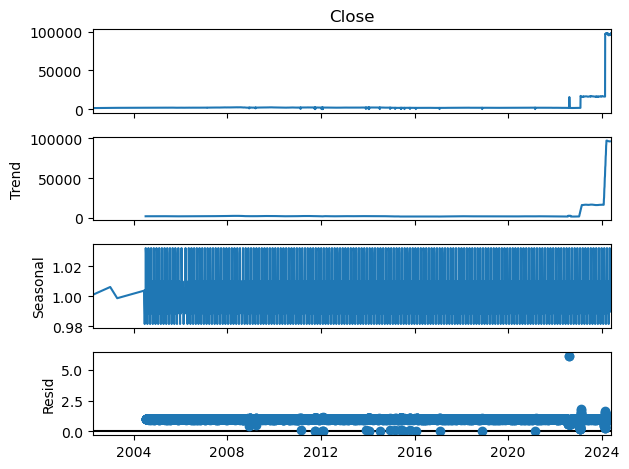

In [22]:
# Décomposition de la série temporelle des prix de clôture
result = seasonal_decompose(eurlbp_data['Close'], model='multiplicative', period=30)
result.plot()
plt.show()

* Prix de Clôture : Les prix de clôture montrent une augmentation notable depuis 2020, avec des pics significatifs en 2024. Cela indique une volatilité accrue et des mouvements de marché importants sur cette période.

* Tendances : On observe une tendance haussière marquée à partir de 2020, culminant en 2024. Cette tendance haussière prolongée suggère un mouvement de marché soutenu qui peut être exploité pour des stratégies d'investissement à long terme si celà se maintient et que les résidues venait à diminuer.

* Saisonnalité :  Bien que les variations saisonnières semblent relativement faibles par rapport à la tendance générale, elles peuvent fournir des indications sur des cycles récurrents, aidant à prévoir les mouvements de prix à court terme.

* Résidus : La présence de nombreux résidus significatifs, surtout après 2020, indique des événements spécifiques ou des anomalies de marché. Analyser ces résidus peut aider à identifier des événements non récurrents ou des chocs externes qui ont influencé les prix.

### 2. Autocorrélation et autocorrélation partielle

L'autocorrélation mesure la corrélation entre les valeurs d'une série temporelle et les valeurs décalées de cette même série. Elle aide à identifier la persistance ou la répétition des motifs dans les données sur différentes périodes de décalage (lags).

* ACF (Autocorrelation Function) : Représente la corrélation entre la série temporelle et ses propres valeurs décalées.
        Un coefficient d'autocorrélation élevé à un certain décalage indique une relation forte entre les valeurs actuelles et les valeurs passées à ce décalage.

L'autocorrélation partielle mesure la corrélation entre les valeurs de la série temporelle à différents décalages, en éliminant l'effet des décalages intermédiaires. Cela aide à identifier les décalages qui ont un effet direct sur la série temporelle, sans l'influence des décalages précédents.

* PACF (Partial Autocorrelation Function) :Montre la corrélation entre la série temporelle et ses valeurs décalées en contrôlant pour les décalages intermédiaires. Elle permet également d'identifier les décalages qui ont une influence directe sur les valeurs actuelles de la série.

L'analyse des fonctions d'autocorrélation et d'autocorrélation partielle peuvent aidet à identifier les modèles ARIMA  appropriés pour les prévisions. Par exemple, des pics significatifs dans l'ACF ou la PACF peuvent indiquer des ordres AR (AutoRegressive) ou MA (Moving Average) potentiels.


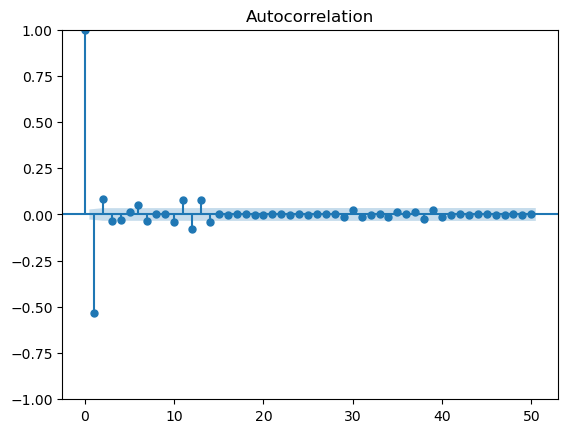

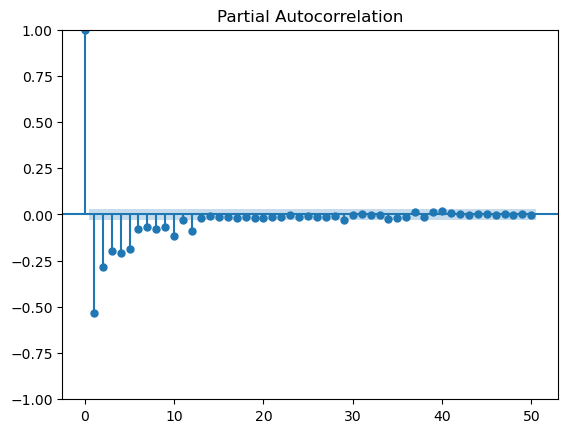

In [23]:
# Autocorrélation des rendements quotidiens
plot_acf(eurlbp_data['Log Returns'].dropna(), lags=50)
plt.show()

# Autocorrélation partielle des rendements quotidiens
plot_pacf(eurlbp_data['Log Returns'].dropna(), lags=50)
plt.show()

**Autocorrélation (ACF)**

* Décroissance rapide : La décroissance rapide des coefficients d'autocorrélation après le premier lag indique une faible corrélation des rendements quotidiens au-delà de quelques jours.
* Significativité à court terme : Quelques lags (1 à 5) montrent des autocorrélations faibles mais significatives, suggérant une certaine persistance à court terme.

**Autocorrélation Partielle (PACF)**

* Lags significatifs : Les premiers lags (1 à 10) montrent des autocorrélations partielles significatives, indiquant une influence directe des rendements récents jusqu'à environ 10 jours.
* Diminution Progressive : Au-delà de 10 lags, les valeurs deviennent insignifiantes, indiquant une influence limitée des rendements plus anciens.

**Deductions**

* Modélisation ARIMA : Les résultats suggèrent l'utilisation de modèles ARIMA à faibles ordres AR et MA pour modéliser les rendements quotidiens.
* Prévisions à court terme : Les lags significatifs à court terme permettent des prévisions efficaces pour des stratégies de trading à court terme.
* Gestion des risques : La faible persistance des rendements au-delà de quelques jours aide à concevoir des stratégies de gestion des risques pour les périodes de volatilité élevée.

### 3. Test de Dickey-Fuller augmenté

Dans notre analyse des rendements de la paire EUR/LBP, le test de Dickey-Fuller augmenté (ADF) est essentiel pour vérifier si les données sont stationnaires. La stationnarité, caractérisée par des propriétés statistiques constantes dans le temps, est cruciale pour appliquer des modèles de séries temporelles comme ARIMA.

Ce test nous aide à déterminer si les données nécessitent des transformations supplémentaires, assurant ainsi la robustesse et la précision de nos prévisions.

In [14]:
# Test de Dickey-Fuller augmenté
result = adfuller(eurlbp_data['Close'].dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: 0.780233801814466
p-value: 0.9913103110839376


Les résultats du test ADF (ADF Statistic: 0.7802, p-value: 0.9913) indiquent que les prix de clôture de la paire EUR/LBP ne sont pas stationnaires.

Pour garantir la précision de nos modèles de prévision, nous devons appliquer des transformations comme la différenciation pour rendre les données stationnaires. Une fois les données transformées, nous pourrons utiliser des modèles ARIMA pour des prévisions fiables.

# Entrainement des modeles.

## Modele Random Forest

### Preprocessing

In [15]:
# Permet de réinitialiser le df pour les entrainements avec les transformation réalisés lors de l'EDA (datetime)
df_model = eurlbp_data

In [16]:
# Ajouter RSI et MACD
eurlbp_data['RSI'] = ta.momentum.rsi(eurlbp_data['Close'], window=14)
eurlbp_data['MACD'] = ta.trend.macd(eurlbp_data['Close'])
eurlbp_data['MACD Signal'] = ta.trend.macd_signal(eurlbp_data['Close'])
eurlbp_data['MACD Hist'] = ta.trend.macd_diff(eurlbp_data['Close'])
eurlbp_data['7D MA'] = eurlbp_data['Close'].rolling(window=7).mean()
eurlbp_data['15D MA'] = eurlbp_data['Close'].rolling(window=15).mean()
eurlbp_data['30D MA'] = eurlbp_data['Close'].rolling(window=30).mean()
eurlbp_data['Bollinger High'] = ta.volatility.bollinger_hband(eurlbp_data['Close'], window=20)
eurlbp_data['Bollinger Low'] = ta.volatility.bollinger_lband(eurlbp_data['Close'], window=20)
eurlbp_data['ATR'] = ta.volatility.average_true_range(eurlbp_data['High'], eurlbp_data['Low'], eurlbp_data['Close'], window=14)
eurlbp_data['Log Returns'] = np.log(eurlbp_data['Close'] / eurlbp_data['Close'].shift(1))

In [17]:
# Décomposition de la série temporelle (période de 30 jours)
decomposition = seasonal_decompose(eurlbp_data['Close'], model='multiplicative', period=30)
eurlbp_data['Trend'] = decomposition.trend
eurlbp_data['Seasonal'] = decomposition.seasonal
eurlbp_data['Resid'] = decomposition.resid

In [18]:
# Extraction des caractéristiques temporelles depuis l'index
eurlbp_data['Day'] = eurlbp_data.index.day
eurlbp_data['Month'] = eurlbp_data.index.month
eurlbp_data['Year'] = eurlbp_data.index.year

In [19]:
# Ajouter des décalages temporels comme caractéristiques
eurlbp_data['Lag1'] = eurlbp_data['Close'].shift(1)
eurlbp_data['Lag2'] = eurlbp_data['Close'].shift(2)

In [20]:
# Supprimer les valeurs manquantes après avoir ajouté toutes les caractéristiques
eurlbp_data.dropna(inplace=True)

In [21]:
# Normalisation des données
scaler = StandardScaler()
scaled_features = scaler.fit_transform(eurlbp_data[['RSI', 'MACD', 'MACD Signal', 'MACD Hist', '7D MA', '15D MA','30D MA', 'Bollinger High', 'Bollinger Low', 'ATR', 'Log Returns', 'Lag1', 'Lag2', 'Day', 'Month', 'Year', 'Trend', 'Seasonal', 'Resid']])
scaled_features = pd.DataFrame(scaled_features, index=eurlbp_data.index, columns=['RSI', 'MACD', 'MACD Signal', 'MACD Hist', '7D MA', '15D MA','30D MA', 'Bollinger High', 'Bollinger Low', 'ATR', 'Log Returns', 'Lag1', 'Lag2', 'Day', 'Month', 'Year', 'Trend', 'Seasonal', 'Resid'])

In [22]:
# Features and Target
X = scaled_features
y = eurlbp_data['Close']

In [23]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [188]:
# Validation croisée avec TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X_train):
    X_train_fold, X_valid_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_valid_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # Modèle Random Forest
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train_fold, y_train_fold)

    # Prédictions
    y_valid_pred = rf_model.predict(X_valid_fold)

    # Evaluation du modèle
    mse_forest = mean_squared_error(y_valid_fold, y_valid_pred)
    mae_forest = mean_absolute_error(y_valid_fold, y_valid_pred)
    rmse_forest = np.sqrt(mse_forest)
    r2_forest = r2_score(y_valid_fold, y_valid_pred)

    print(f'Mean Squared Error: {mse_forest}')
    print(f'Mean Absolute Error: {mae_forest}')
    print(f'Root Mean Squared Error: {rmse_forest}')
    print(f'R-squared: {r2_forest}')

Mean Squared Error: 23576.595978189525
Mean Absolute Error: 107.14334398143733
Root Mean Squared Error: 153.54672245993896
R-squared: -0.03634608294865771
Mean Squared Error: 25015.813710470484
Mean Absolute Error: 31.351417379765355
Root Mean Squared Error: 158.16388244624778
R-squared: 0.43332687087015587
Mean Squared Error: 2942.878714205633
Mean Absolute Error: 9.084728536642222
Root Mean Squared Error: 54.24830609526562
R-squared: 0.9232277975386558
Mean Squared Error: 7869.252634275593
Mean Absolute Error: 69.59314330495603
Root Mean Squared Error: 88.70880809860762
R-squared: 0.7128810704237292
Mean Squared Error: 95.82387751543473
Mean Absolute Error: 6.496413093475102
Root Mean Squared Error: 9.788967132207295
R-squared: 0.9889111303206269


#### Test rolling window training

In [190]:
y_pred = rf_model.predict(X_test)

In [191]:
# Évaluation du modèle
mse_forest = mean_squared_error(y_test, y_pred)
mae_forest = mean_absolute_error(y_test, y_pred)
rmse_forest = np.sqrt(mse_forest_grid)
r2_forest = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse_forest}')
print(f'Mean Absolute Error: {mae_forest}')
print(f'Root Mean Squared Error: {rmse_forest}')
print(f'R-squared: {r2_forest}')

Mean Squared Error: 520939331.73143774
Mean Absolute Error: 8740.82390258204
Root Mean Squared Error: 22824.23010861407
R-squared: -0.1503780770898493


### Training

In [200]:
# Initialize an empty list to store predictions
y_pred = []

# Define the rolling window size
window_size = 256

# Use the test set length for predictions
test_length = len(X_test)

# Loop through each day in the test set for rolling window prediction
for i in range(test_length):
    # Define the training window
    start_idx = max(0, len(X_train) - test_length + i - window_size)
    end_idx = len(X_train) - test_length + i
    
    X_train_window = X_train.iloc[start_idx:end_idx]
    y_train_window = y_train.iloc[start_idx:end_idx]
    
    # Initialize and train the model on the training window
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train_window, y_train_window)
    
    # Predict the next day
    X_next = X_test.iloc[i].values.reshape(1, -1)
    y_pred_next = rf_model.predict(X_next)
    y_pred.append(y_pred_next[0])



mse = mean_squared_error(y_test[:len(y_pred)], y_pred)
rmse_forest = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_forest)

/Users/omarmorsli/miniconda3/envs/kevin/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

/Users/omarmorsli/miniconda3/envs/kevin/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

/Users/omarmorsli/miniconda3/envs/kevin/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

/Users/omarmorsli/miniconda3/envs/kevin/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

/Users/omarmorsli/miniconda3/envs/kevin/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

/Users/omarmors

### Gridsearch

In [37]:
# Optimisation des hyperparamètres
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=tscv,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [38]:
# Meilleurs hyperparamètres
best_rf_model = grid_search.best_estimator_


In [39]:
# Prédictions finales
y_pred = best_rf_model.predict(X_test)

In [40]:
# Évaluation du modèle
mse_forest_grid = mean_squared_error(y_test, y_pred)
mae_forest_grid = mean_absolute_error(y_test, y_pred)
rmse_forest_grid = np.sqrt(mse_forest_grid)
r2_forest_grid = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse_forest_grid}')
print(f'Mean Absolute Error: {mae_forest_grid}')
print(f'Root Mean Squared Error: {rmse_forest_grid}')
print(f'R-squared: {r2_forest_grid}')

Mean Squared Error: 520945480.05096495
Mean Absolute Error: 8738.736797896518
Root Mean Squared Error: 22824.23010861407
R-squared: -0.15039165427929202


In [41]:
# Importance des caractéristiques
importances = best_rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

           Feature  Importance
4            7D MA    0.488501
18           Resid    0.120361
16           Trend    0.113848
11            Lag1    0.111329
3        MACD Hist    0.088046
10     Log Returns    0.052140
5           15D MA    0.010702
12            Lag2    0.004732
0              RSI    0.003894
7   Bollinger High    0.003715
6           30D MA    0.000998
8    Bollinger Low    0.000586
1             MACD    0.000316
15            Year    0.000288
17        Seasonal    0.000276
9              ATR    0.000125
2      MACD Signal    0.000087
13             Day    0.000033
14           Month    0.000020


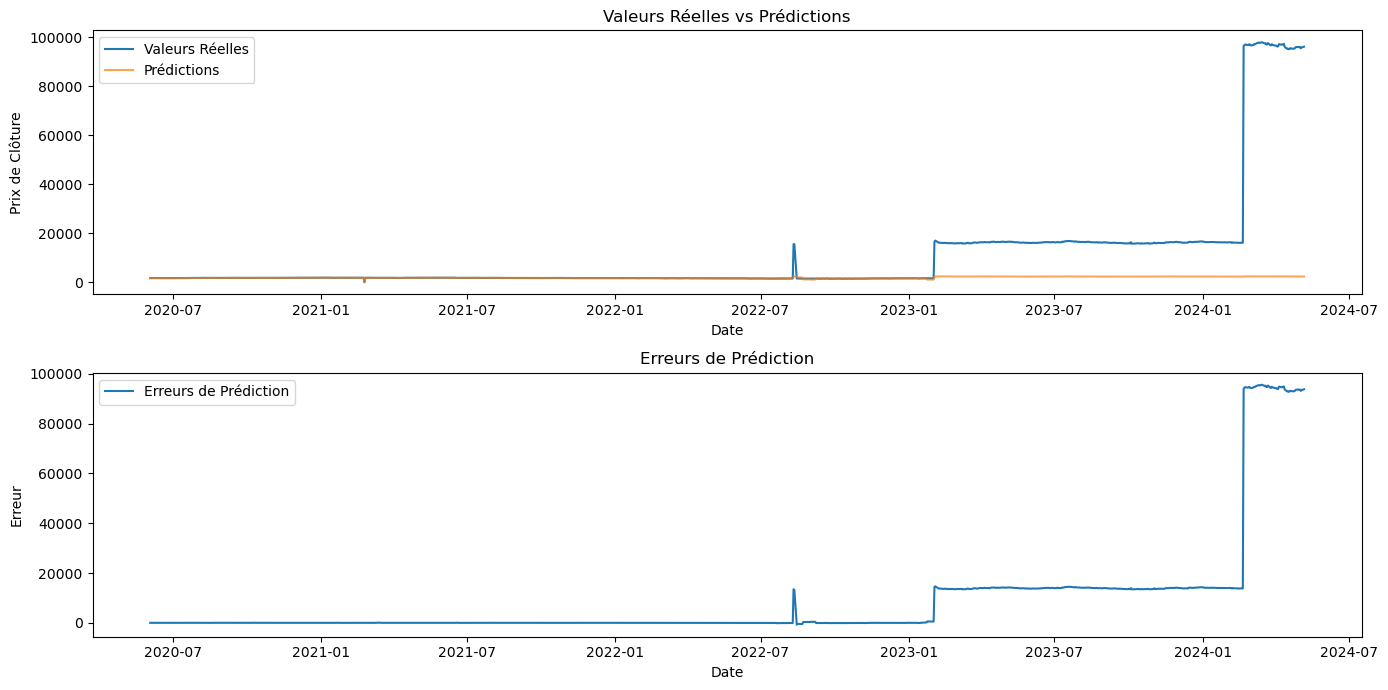

In [42]:
# Visualisation des performances
plt.figure(figsize=(14, 7))

# Valeurs réelles vs prédictions
plt.subplot(2, 1, 1)
plt.plot(y_test.index, y_test, label='Valeurs Réelles')
plt.plot(y_test.index, y_pred, label='Prédictions', alpha=0.7)
plt.title('Valeurs Réelles vs Prédictions')
plt.xlabel('Date')
plt.ylabel('Prix de Clôture')
plt.legend()

# Erreurs de prédiction
plt.subplot(2, 1, 2)
plt.plot(y_test.index, y_test - y_pred, label='Erreurs de Prédiction')
plt.title('Erreurs de Prédiction')
plt.xlabel('Date')
plt.ylabel('Erreur')
plt.legend()

plt.tight_layout()
plt.show()

## Modele Gxboost

### Training

In [143]:
# Modèle XGBoost
for train_index, test_index in tscv.split(X_train):
    X_train_fold, X_valid_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_valid_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # Modèle Random Forest
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
    xgb_model.fit(X_train, y_train)

    # Prédictions
    y_valid_pred = xgb_model.predict(X_valid_fold)

    # Evaluation du modèle
    mse_forest = mean_squared_error(y_valid_fold, y_valid_pred)
    mae_forest = mean_absolute_error(y_valid_fold, y_valid_pred)
    rmse_forest = np.sqrt(mse_forest)
    r2_forest = r2_score(y_valid_fold, y_valid_pred)

    print(f'Mean Squared Error: {mse_forest}')
    print(f'Mean Absolute Error: {mae_forest}')
    print(f'Root Mean Squared Error: {rmse_forest}')
    print(f'R-squared: {r2_forest}')

Mean Squared Error: 2.143008477058511
Mean Absolute Error: 1.1082870170397283
Root Mean Squared Error: 1.463901798980557
R-squared: 0.9999058007168219
Mean Squared Error: 2.030016753318144
Mean Absolute Error: 1.0704072398941622
Root Mean Squared Error: 1.424786564127464
R-squared: 0.9999540148500023
Mean Squared Error: 2.58936072246567
Mean Absolute Error: 1.2417349447436739
Root Mean Squared Error: 1.6091490678199052
R-squared: 0.9999324501806103
Mean Squared Error: 1.8694325106594105
Mean Absolute Error: 1.0137889964239855
Root Mean Squared Error: 1.367271922720353
R-squared: 0.9999317915580651
Mean Squared Error: 2.853851594172403
Mean Absolute Error: 1.2618873061210412
Root Mean Squared Error: 1.6893346602057282
R-squared: 0.9996697484047549


In [144]:
# Prédictions
y_pred = xgb_model.predict(X_test)

In [145]:
# Évaluation du modèle
mse_xgb = mean_squared_error(y_test, y_pred)
mae_xgb = mean_absolute_error(y_test, y_pred)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse_xgb}')
print(f'Mean Absolute Error: {mae_xgb}')
print(f'Root Mean Squared Error: {rmse_xgb}')
print(f'R-squared: {r2_xgb}')

Mean Squared Error: 521038309.60068536
Mean Absolute Error: 8743.127086273558
Root Mean Squared Error: 22826.263592640065
R-squared: -0.1505966475911802


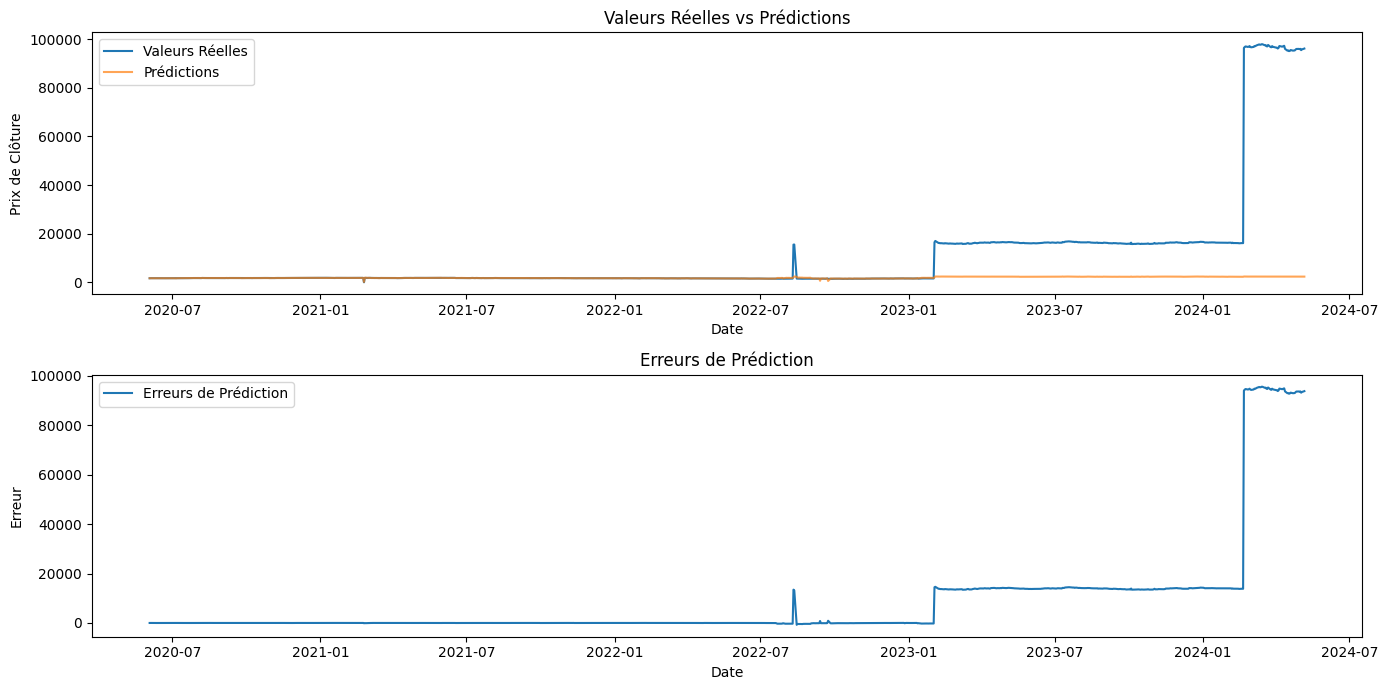

In [41]:
# Visualisation des performances
plt.figure(figsize=(14, 7))

# Valeurs réelles vs prédictions
plt.subplot(2, 1, 1)
plt.plot(y_test.index, y_test, label='Valeurs Réelles')
plt.plot(y_test.index, y_pred, label='Prédictions', alpha=0.7)
plt.title('Valeurs Réelles vs Prédictions')
plt.xlabel('Date')
plt.ylabel('Prix de Clôture')
plt.legend()

# Erreurs de prédiction
plt.subplot(2, 1, 2)
plt.plot(y_test.index, y_test - y_pred, label='Erreurs de Prédiction')
plt.title('Erreurs de Prédiction')
plt.xlabel('Date')
plt.ylabel('Erreur')
plt.legend()

plt.tight_layout()
plt.show()

### Gridsearch

In [46]:
# Optimisation des hyperparamètres
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
                           param_grid=param_grid,
                           cv=TimeSeriesSplit(n_splits=5),
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, imp...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.7, 0.8, 1.0]},
             scoring='neg_mean_squared_error')

In [47]:
# Meilleurs hyperparamètres
best_xgb_model = grid_search.best_estimator_

In [48]:
# Prédictions finales
y_pred = best_xgb_model.predict(X_test)

In [49]:
# Évaluation du modèle
mse_xgb_grid = mean_squared_error(y_test, y_pred)
mae_xgb_grid = mean_absolute_error(y_test, y_pred)
rmse_xgb_grid = np.sqrt(mse_xgb_grid)
r2_xgb_grid = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse_xgb_grid}')
print(f'Mean Absolute Error: {mae_xgb_grid}')
print(f'Root Mean Squared Error: {rmse_xgb_grid}')
print(f'R-squared: {r2_xgb_grid}')

Mean Squared Error: 521514240.2456141
Mean Absolute Error: 8739.733203244588
Root Mean Squared Error: 22836.686279879006
R-squared: -0.1516476340435211


In [50]:
# Visualisation des performances
plt.figure(figsize=(14, 7))

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

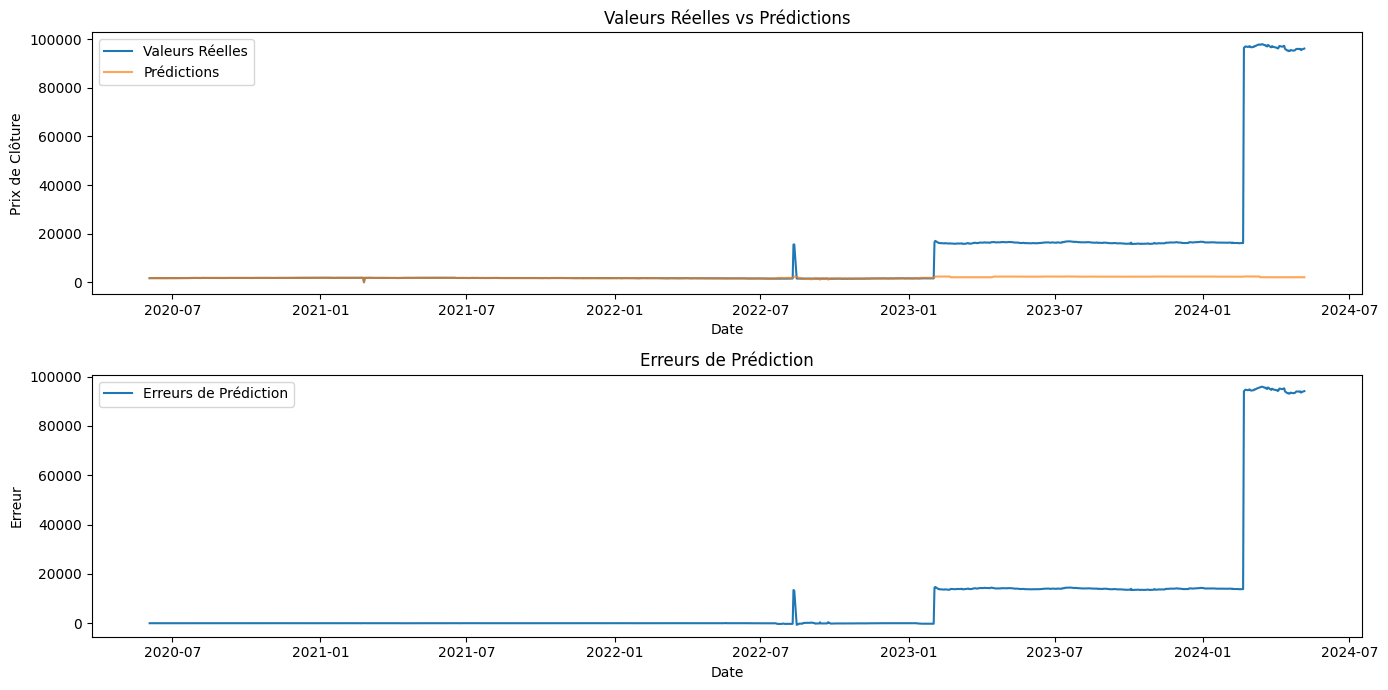

In [47]:
# Visualisation des performances
plt.figure(figsize=(14, 7))

# Valeurs réelles vs prédictions
plt.subplot(2, 1, 1)
plt.plot(y_test.index, y_test, label='Valeurs Réelles')
plt.plot(y_test.index, y_pred, label='Prédictions', alpha=0.7)
plt.title('Valeurs Réelles vs Prédictions')
plt.xlabel('Date')
plt.ylabel('Prix de Clôture')
plt.legend()

# Erreurs de prédiction
plt.subplot(2, 1, 2)
plt.plot(y_test.index, y_test - y_pred, label='Erreurs de Prédiction')
plt.title('Erreurs de Prédiction')
plt.xlabel('Date')
plt.ylabel('Erreur')
plt.legend()

plt.tight_layout()
plt.show()

### Gridsearch with Optuna

In [51]:
pip install optuna

  Using cached alembic-1.13.1-py3-none-any.whl.metadata (7.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 22.8 MB/s eta 0:00:00
Using cached alembic-1.13.1-py3-none-any.whl (233 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 16.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [58]:
import optuna

def objective(trial):
    # Define the hyperparameters to tune
    params = {
        'objective': 'reg:squarederror',
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'random_state': 42
    }
    
    # Create the model with the current hyperparameters
    model = xgb.XGBRegressor(**params)
    
    # Perform cross-validation
    cv_scores = []

    for train_index, val_index in tscv.split(X_train):
        X_train_cv, X_val_cv = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]
        
        model.fit(X_train_cv, y_train_cv, eval_set=[(X_val_cv, y_val_cv)], early_stopping_rounds=10, verbose=False)
        y_pred = model.predict(X_val_cv)
        cv_scores.append(mean_squared_error(y_val_cv, y_pred))
    
    # Return the average of the cross-validated scores
    return np.mean(cv_scores)

In [59]:
# Create the study and optimize it
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

[I 2024-06-05 19:13:53,534] A new study created in memory with name: no-name-c56fab32-cc21-48a2-8b55-4893563dec5e
/Users/omarmorsli/miniconda3/envs/kevin/lib/python3.9/site-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/Users/omarmorsli/miniconda3/envs/kevin/lib/python3.9/site-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/Users/omarmorsli/miniconda3/envs/kevin/lib/python3.9/site-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/Users/omarmorsli/miniconda3/envs/kevin/lib/python3.9/site-packages/xg

In [60]:
# Get the best parameters and train the final model
best_params = study.best_params
best_model = xgb.XGBRegressor(**best_params, random_state=42)
best_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7951675624739142, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=4.045203264610867,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.25663158081219034,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=11, max_leaves=None,
             min_child_weight=8, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=376, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [61]:
# Make predictions on the test set and evaluate
y_pred = best_model.predict(X_test)

In [62]:
# Évaluation du modèle
mse_xgb_grid = mean_squared_error(y_test, y_pred)
mae_xgb_grid = mean_absolute_error(y_test, y_pred)
rmse_xgb_grid = np.sqrt(mse_xgb_grid)
r2_xgb_grid = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse_xgb_grid}')
print(f'Mean Absolute Error: {mae_xgb_grid}')
print(f'Root Mean Squared Error: {rmse_xgb_grid}')
print(f'R-squared: {r2_xgb_grid}')

Mean Squared Error: 522780029.7649112
Mean Absolute Error: 8755.011893791245
Root Mean Squared Error: 22864.383432861494
R-squared: -0.15444284727568336


## Modele LSTM

### Preprocessing

In [24]:
# Charger les données
eurlbp_data = df_model

In [25]:
# Ajouter RSI, MACD, Bollinger Bands, ATR et Log Returns
eurlbp_data['RSI'] = ta.momentum.rsi(eurlbp_data['Close'], window=14)
eurlbp_data['MACD'] = ta.trend.macd(eurlbp_data['Close'])
eurlbp_data['MACD Signal'] = ta.trend.macd_signal(eurlbp_data['Close'])
eurlbp_data['MACD Hist'] = ta.trend.macd_diff(eurlbp_data['Close'])
eurlbp_data['7D MA'] = eurlbp_data['Close'].rolling(window=7).mean()
eurlbp_data['15D MA'] = eurlbp_data['Close'].rolling(window=15).mean()
eurlbp_data['30D MA'] = eurlbp_data['Close'].rolling(window=30).mean()
eurlbp_data['Bollinger High'] = ta.volatility.bollinger_hband(eurlbp_data['Close'], window=20)
eurlbp_data['Bollinger Low'] = ta.volatility.bollinger_lband(eurlbp_data['Close'], window=20)
eurlbp_data['ATR'] = ta.volatility.average_true_range(eurlbp_data['High'], eurlbp_data['Low'], eurlbp_data['Close'], window=14)
eurlbp_data['Log Returns'] = np.log(eurlbp_data['Close'] / eurlbp_data['Close'].shift(1))

In [26]:
# Supprimer les valeurs manquantes après avoir ajouté toutes les caractéristiques
eurlbp_data.dropna(inplace=True)

In [27]:
# Décomposition de la série temporelle (période de 30 jours)
decomposition = seasonal_decompose(eurlbp_data['Close'], model='multiplicative', period=30)
eurlbp_data['Trend'] = decomposition.trend
eurlbp_data['Seasonal'] = decomposition.seasonal
eurlbp_data['Resid'] = decomposition.resid

# Extraction des caractéristiques temporelles depuis l'index
eurlbp_data['Day'] = eurlbp_data.index.day
eurlbp_data['Month'] = eurlbp_data.index.month
eurlbp_data['Year'] = eurlbp_data.index.year

# Ajouter des décalages temporels comme caractéristiques
eurlbp_data['Lag1'] = eurlbp_data['Close'].shift(1)
eurlbp_data['Lag2'] = eurlbp_data['Close'].shift(2)

In [28]:
# Supprimer les valeurs manquantes après avoir ajouté toutes les caractéristiques
eurlbp_data.dropna(inplace=True)

In [29]:
# Normalisation des données
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(eurlbp_data[['Close', 'RSI', 'MACD', 'MACD Signal', 'MACD Hist', 'Lag1', 'Lag2', '7D MA', '15D MA','30D MA','Bollinger High', 'Bollinger Low','ATR','Log Returns' ]])

In [30]:
# Division en train et test sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [31]:
# Création des séquences de données pour LSTM
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        X.append(dataset[i:(i+time_step)])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 60  # Ajustement du time_step
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [32]:
# Reshape des données pour LSTM [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

### Training

In [33]:
# Modèle LSTM
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(time_step, X_train.shape[2])))
model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(50))
model.add(Dense(1))

In [34]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
125/125 [==============================] - 8s 54ms/step - loss: 7.5846e-04 - val_loss: 0.0386
Epoch 2/20
125/125 [==============================] - 7s 56ms/step - loss: 1.3502e-05 - val_loss: 0.0359
Epoch 3/20
125/125 [==============================] - 7s 53ms/step - loss: 8.4995e-06 - val_loss: 0.0323
Epoch 4/20
125/125 [==============================] - 7s 54ms/step - loss: 6.3045e-06 - val_loss: 0.0287
Epoch 5/20
125/125 [==============================] - 7s 55ms/step - loss: 5.2289e-06 - val_loss: 0.0249
Epoch 6/20
125/125 [==============================] - 7s 56ms/step - loss: 4.2635e-06 - val_loss: 0.0212
Epoch 7/20
125/125 [==============================] - 7s 53ms/step - loss: 3.7197e-06 - val_loss: 0.0181
Epoch 8/20
125/125 [==============================] - 7s 53ms/step - loss: 3.4347e-06 - val_loss: 0.0159
Epoch 9/20
125/125 [==============================] - 7s 53ms/step - loss: 3.0278e-06 - val_loss: 0.0143
Epoch 10/20
125/125 [==============================] - 

In [35]:
model.save('eurlbp_lstm_model.h5')

/Users/omarmorsli/miniconda3/envs/lstmapi3/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [74]:
# Prédictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [75]:
# Inverser la normalisation pour obtenir les valeurs réelles
train_predict_extended = np.zeros((train_predict.shape[0], scaled_data.shape[1]))
test_predict_extended = np.zeros((test_predict.shape[0], scaled_data.shape[1]))

train_predict_extended[:, 0] = train_predict[:, 0]
test_predict_extended[:, 0] = test_predict[:, 0]

train_predict = scaler.inverse_transform(train_predict_extended)[:, 0]
test_predict = scaler.inverse_transform(test_predict_extended)[:, 0]

In [76]:
# Inverser la normalisation pour y_train et y_test
y_train_extended = np.zeros((y_train.shape[0], scaled_data.shape[1]))
y_test_extended = np.zeros((y_test.shape[0], scaled_data.shape[1]))

y_train_extended[:, 0] = y_train
y_test_extended[:, 0] = y_test

y_train = scaler.inverse_transform(y_train_extended)[:, 0]
y_test = scaler.inverse_transform(y_test_extended)[:, 0]

In [77]:
# Vérifier les valeurs NaN
print(f'y_test NaN values: {np.isnan(y_test).sum()}')
print(f'test_predict NaN values: {np.isnan(test_predict).sum()}')

y_test NaN values: 0
test_predict NaN values: 0


In [78]:
# Évaluation du modèle
mse_lstm = mean_squared_error(y_test, test_predict)
mae_lstm = mean_absolute_error(y_test, test_predict)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_test, test_predict)

print(f'Mean Squared Error: {mse_lstm}')
print(f'Mean Absolute Error: {mae_lstm}')
print(f'Root Mean Squared Error: {rmse_lstm}')
print(f'R-squared: {r2_lstm}')

Mean Squared Error: 157281417.81625268
Mean Absolute Error: 3262.310556189206
Root Mean Squared Error: 12541.188851789637
R-squared: 0.5640934218557645


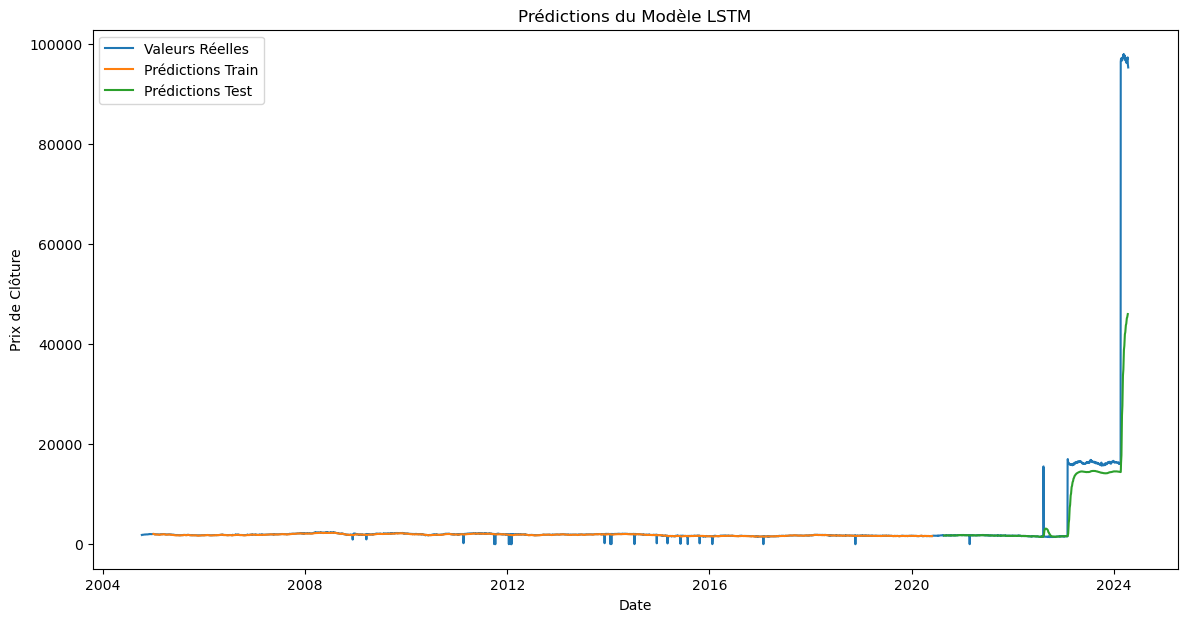

In [79]:
# Visualisation des résultats
plt.figure(figsize=(14, 7))
plt.plot(eurlbp_data.index, eurlbp_data['Close'], label='Valeurs Réelles')
plt.plot(eurlbp_data.index[time_step:len(train_predict) + time_step], train_predict, label='Prédictions Train')
plt.plot(eurlbp_data.index[len(train_predict) + (2 * time_step) + 1:len(train_predict) + (2 * time_step) + 1 + len(test_predict)], test_predict, label='Prédictions Test')
plt.title('Prédictions du Modèle LSTM')
plt.xlabel('Date')
plt.ylabel('Prix de Clôture')
plt.legend()
plt.show()

## Modele Prophet

### Preprocessing

In [80]:
# Charger les données
eurlbp_data = df_model

In [81]:
# Ajouter RSI, MACD, Bollinger Bands, ATR et Log Returns
eurlbp_data['RSI'] = ta.momentum.rsi(eurlbp_data['Close'], window=14)
eurlbp_data['MACD'] = ta.trend.macd(eurlbp_data['Close'])
eurlbp_data['MACD Signal'] = ta.trend.macd_signal(eurlbp_data['Close'])
eurlbp_data['MACD Hist'] = ta.trend.macd_diff(eurlbp_data['Close'])
eurlbp_data['7D MA'] = eurlbp_data['Close'].rolling(window=7).mean()
eurlbp_data['15D MA'] = eurlbp_data['Close'].rolling(window=15).mean()
eurlbp_data['30D MA'] = eurlbp_data['Close'].rolling(window=30).mean()
eurlbp_data['Bollinger High'] = ta.volatility.bollinger_hband(eurlbp_data['Close'], window=20)
eurlbp_data['Bollinger Low'] = ta.volatility.bollinger_lband(eurlbp_data['Close'], window=20)
eurlbp_data['ATR'] = ta.volatility.average_true_range(eurlbp_data['High'], eurlbp_data['Low'], eurlbp_data['Close'], window=14)
eurlbp_data['Log Returns'] = np.log(eurlbp_data['Close'] / eurlbp_data['Close'].shift(1))

In [82]:
# Supprimer les valeurs manquantes après avoir ajouté toutes les caractéristiques
eurlbp_data.dropna(inplace=True)

In [83]:
# Préparation des données pour Prophet
df = eurlbp_data.reset_index()[['Date', 'Close']]
df.columns = ['ds', 'y']

In [84]:
# Ajout de variables explicatives basées sur notre EDA
df['day'] = df['ds'].dt.day
df['month'] = df['ds'].dt.month
df['year'] = df['ds'].dt.year
df['7d_ma'] = eurlbp_data['7D MA'].values
df['15d_ma'] = eurlbp_data['15D MA'].values
df['30d_ma'] = eurlbp_data['30D MA'].values
df['rsi'] = eurlbp_data['RSI'].values
df['macd'] = eurlbp_data['MACD'].values
df['macd_signal'] = eurlbp_data['MACD Signal'].values
df['bollinger_high'] = eurlbp_data['Bollinger High'].values
df['bollinger_low'] = eurlbp_data['Bollinger Low'].values
df['atr'] = eurlbp_data['ATR'].values
df['log_returns'] = eurlbp_data['Log Returns'].values

### Training

In [85]:
# Ajustement du modèle Prophet avec les régressors
model = Prophet(daily_seasonality=True)
model.add_regressor('day')
model.add_regressor('month')
model.add_regressor('year')
model.add_regressor('7d_ma')
model.add_regressor('15d_ma')
model.add_regressor('30d_ma')
model.add_regressor('rsi')
model.add_regressor('macd')
model.add_regressor('macd_signal')
model.add_regressor('bollinger_high')
model.add_regressor('bollinger_low')
model.add_regressor('atr')
model.add_regressor('log_returns')
model.fit(df)


19:19:36 - cmdstanpy - INFO - Chain [1] start processing
19:19:37 - cmdstanpy - INFO - Chain [1] done processing


In [86]:
# Prédictions
future = model.make_future_dataframe(periods=30)
future['day'] = future['ds'].dt.day
future['month'] = future['ds'].dt.month
future['year'] = future['ds'].dt.year

In [87]:
# Utilisation des dernières valeurs connues pour les régressors dans les futures dates
last_7d_ma = df['7d_ma'].iloc[-1]
last_15d_ma = df['15d_ma'].iloc[-1]
last_30d_ma = df['30d_ma'].iloc[-1]
last_rsi = df['rsi'].iloc[-1]
last_macd = df['macd'].iloc[-1]
last_macd_signal = df['macd_signal'].iloc[-1]
last_bollinger_high = df['bollinger_high'].iloc[-1]
last_bollinger_low = df['bollinger_low'].iloc[-1]
last_atr = df['atr'].iloc[-1]
last_log_returns = df['log_returns'].iloc[-1]

future['7d_ma'] = last_7d_ma
future['15d_ma'] = last_15d_ma
future['30d_ma'] = last_30d_ma
future['rsi'] = last_rsi
future['macd'] = last_macd
future['macd_signal'] = last_macd_signal
future['bollinger_high'] = last_bollinger_high
future['bollinger_low'] = last_bollinger_low
future['atr'] = last_atr
future['log_returns'] = last_log_returns

forecast = model.predict(future)

/Users/omarmorsli/miniconda3/envs/kevin/lib/python3.9/site-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/Users/omarmorsli/miniconda3/envs/kevin/lib/python3.9/site-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



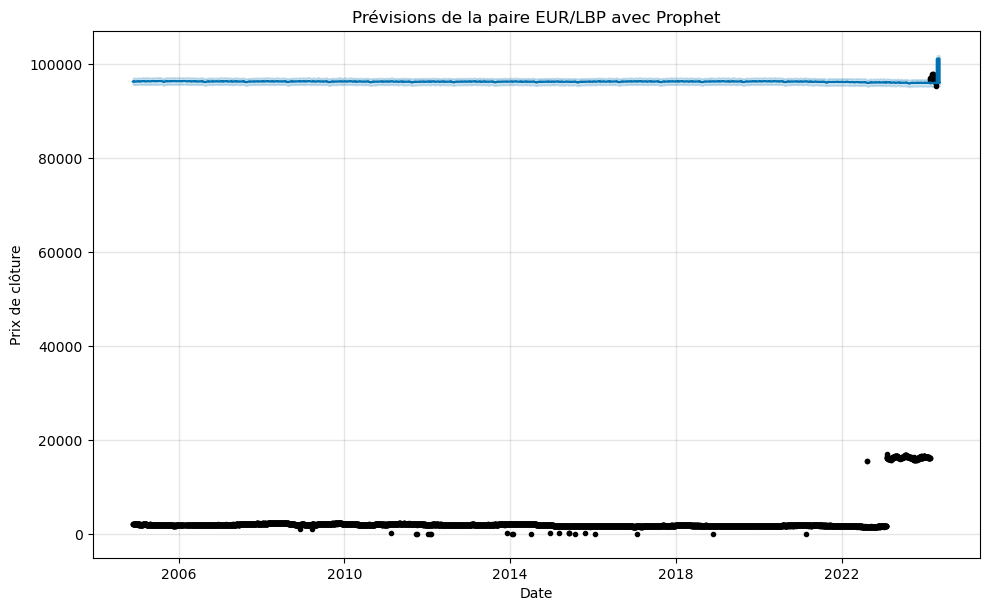

/Users/omarmorsli/miniconda3/envs/kevin/lib/python3.9/site-packages/prophet/plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/Users/omarmorsli/miniconda3/envs/kevin/lib/python3.9/site-packages/prophet/plot.py:351: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/Users/omarmorsli/miniconda3/envs/kevin/lib/python3.9/site-packages/prophet/plot.py:354: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/Use

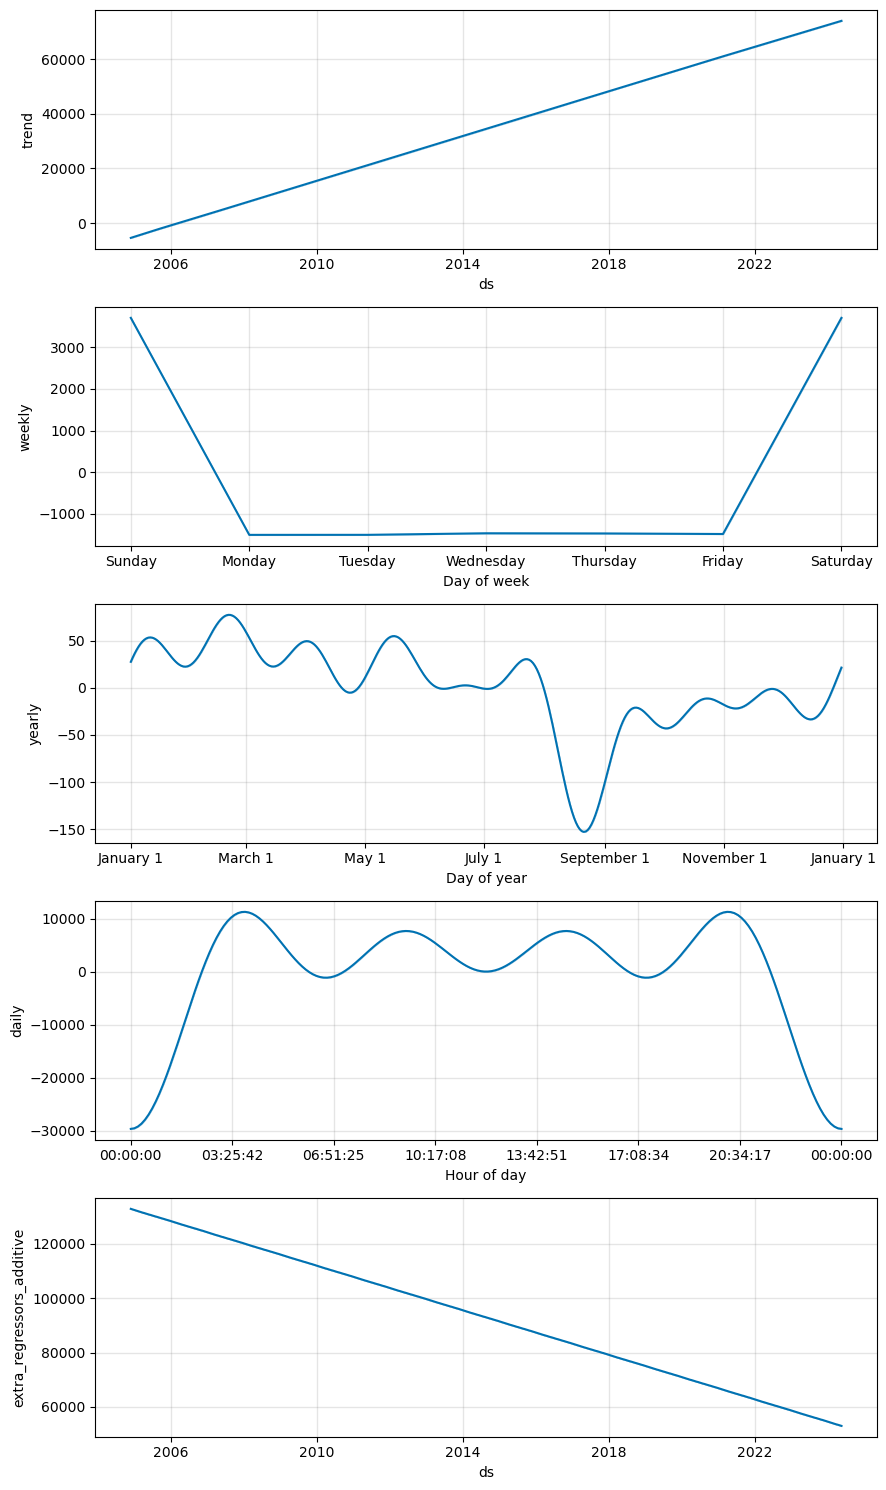

In [88]:
# Visualisation des prévisions
fig = model.plot(forecast)
plt.title('Prévisions de la paire EUR/LBP avec Prophet')
plt.xlabel('Date')
plt.ylabel('Prix de clôture')
plt.show()

# Visualisation des composants des prévisions
fig2 = model.plot_components(forecast)
plt.show()

In [89]:
# Évaluation des performances du modèle
actual = df['y'].values[-30:]
predicted = forecast['yhat'].values[-30:]
mse_prophet = mean_squared_error(actual, predicted)
mae_prophet = mean_absolute_error(actual, predicted)
rmse_prophet = np.sqrt(mse_prophet)
r2_prophet = r2_score(actual, predicted)

print(f'Mean Squared Error: {mse_prophet}')
print(f'Mean Absolute Error: {mae_prophet}')
print(f'Root Mean Squared Error: {rmse_prophet}')
print(f'R-squared: {r2_prophet}')

Mean Squared Error: 5524094.676170549
Mean Absolute Error: 1886.048775979874
Root Mean Squared Error: 2350.339268312247
R-squared: -14.77369379764793


# Modele ARIMA

### Preprocessing

In [90]:
# Charger les données
eurlbp_data = df_model

In [91]:
# Ajouter RSI, MACD, Bollinger Bands, ATR et Log Returns
eurlbp_data['RSI'] = ta.momentum.rsi(eurlbp_data['Close'], window=14)
eurlbp_data['MACD'] = ta.trend.macd(eurlbp_data['Close'])
eurlbp_data['MACD Signal'] = ta.trend.macd_signal(eurlbp_data['Close'])
eurlbp_data['MACD Hist'] = ta.trend.macd_diff(eurlbp_data['Close'])
eurlbp_data['7D MA'] = eurlbp_data['Close'].rolling(window=7).mean()
eurlbp_data['15D MA'] = eurlbp_data['Close'].rolling(window=15).mean()
eurlbp_data['30D MA'] = eurlbp_data['Close'].rolling(window=30).mean()
eurlbp_data['Bollinger High'] = ta.volatility.bollinger_hband(eurlbp_data['Close'], window=20)
eurlbp_data['Bollinger Low'] = ta.volatility.bollinger_lband(eurlbp_data['Close'], window=20)
eurlbp_data['ATR'] = ta.volatility.average_true_range(eurlbp_data['High'], eurlbp_data['Low'], eurlbp_data['Close'], window=14)
eurlbp_data['Log Returns'] = np.log(eurlbp_data['Close'] / eurlbp_data['Close'].shift(1))

In [92]:
# Supprimer les valeurs manquantes après avoir ajouté toutes les caractéristiques
eurlbp_data.dropna(inplace=True)

In [93]:
# Vérification de la stationnarité et transformation des données
def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] > 0.05:
        print("La série n'est pas stationnaire")
    else:
        print("La série est stationnaire")

In [94]:
# Vérification initiale
check_stationarity(eurlbp_data['Close'])

# Suppression des doublons dans l'index
eurlbp_data = eurlbp_data[~eurlbp_data.index.duplicated(keep='first')]

# Réindexer les données pour assurer une fréquence quotidienne
eurlbp_data = eurlbp_data.asfreq('D', method='pad')

ADF Statistic: 0.8261216374868741
p-value: 0.9920463309858105
La série n'est pas stationnaire


In [95]:
# Différenciation des données pour rendre la série stationnaire
eurlbp_data['Close_diff'] = eurlbp_data['Close'].diff()

# Suppression des valeurs manquantes après différenciation
eurlbp_data.dropna(inplace=True)

# Vérification de la stationnarité après différenciation
check_stationarity(eurlbp_data['Close_diff'])

ADF Statistic: -84.22151315067467
p-value: 0.0
La série est stationnaire


In [96]:
# Séparation des données en train et test
train_size = int(len(eurlbp_data) * 0.8)
train_data = eurlbp_data[:train_size]
test_data = eurlbp_data[train_size:]

In [97]:
# Ajustement du modèle ARIMA sur les données différenciées
model = ARIMA(eurlbp_data['Close_diff'], order=(5, 1, 0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Close_diff   No. Observations:                 7038
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -59240.967
Date:                Wed, 05 Jun 2024   AIC                         118493.933
Time:                        19:20:01   BIC                         118535.087
Sample:                    01-08-2005   HQIC                        118508.110
                         - 04-15-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8301      0.001   -809.175      0.000      -0.832      -0.828
ar.L2         -0.6513      0.001   -511.316      0.000      -0.654      -0.649
ar.L3         -0.4846      0.001   -354.422      0.0

In [98]:
# Prédictions pour les 30 prochains jours
forecast_diff = model_fit.forecast(steps=30)
forecast = eurlbp_data['Close'].iloc[-1] + forecast_diff.cumsum()

In [99]:
# Inverser la différenciation pour obtenir les valeurs réelles prévues
forecast_dates = pd.date_range(start=eurlbp_data.index[-1], periods=30, freq='D')
forecast_series = pd.Series(forecast.values, index=forecast_dates)

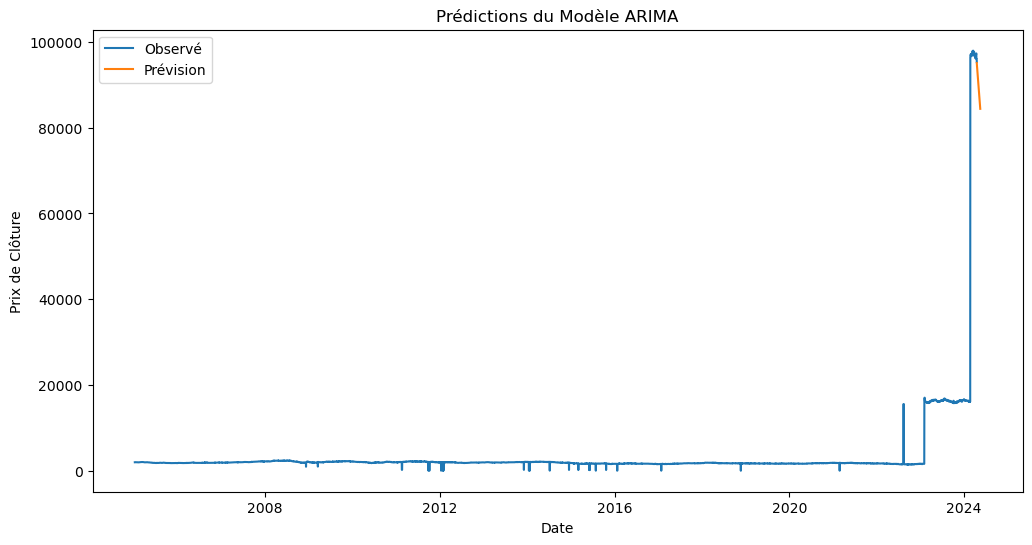

In [100]:
# Visualisation des résultats
plt.figure(figsize=(12, 6))
plt.plot(eurlbp_data.index, eurlbp_data['Close'], label='Observé')
plt.plot(forecast_series.index, forecast_series, label='Prévision')
plt.legend()
plt.title('Prédictions du Modèle ARIMA')
plt.xlabel('Date')
plt.ylabel('Prix de Clôture')
plt.show()

In [101]:
# Évaluation du modèle sur les données de test
train_size = int(len(eurlbp_data) * 0.8)
train_data, test_data = eurlbp_data['Close_diff'][:train_size], eurlbp_data['Close_diff'][train_size:]

# Ajustement du modèle sur les données d'entraînement
model = ARIMA(train_data, order=(5, 1, 0))
model_fit = model.fit()
predictions_diff = model_fit.forecast(steps=len(test_data))
predictions = eurlbp_data['Close'].iloc[train_size - 1] + predictions_diff.cumsum()

In [102]:
# Correspondance des index pour y_test et predictions
y_test = eurlbp_data['Close'].iloc[train_size:train_size + len(predictions)]

In [103]:
# Évaluation des performances
mse_arima = mean_squared_error(y_test, predictions)
mae_arima = mean_absolute_error(y_test, predictions)
rmse_arima = np.sqrt(mse_arima)
r2_arima = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse_arima}')
print(f'Mean Absolute Error: {mae_arima}')
print(f'Root Mean Squared Error: {rmse_arima}')
print(f'R-squared: {r2_arima}')

Mean Squared Error: 312888546.4921266
Mean Absolute Error: 7467.733400760239
Root Mean Squared Error: 17688.65587013684
R-squared: 0.11557379442381144


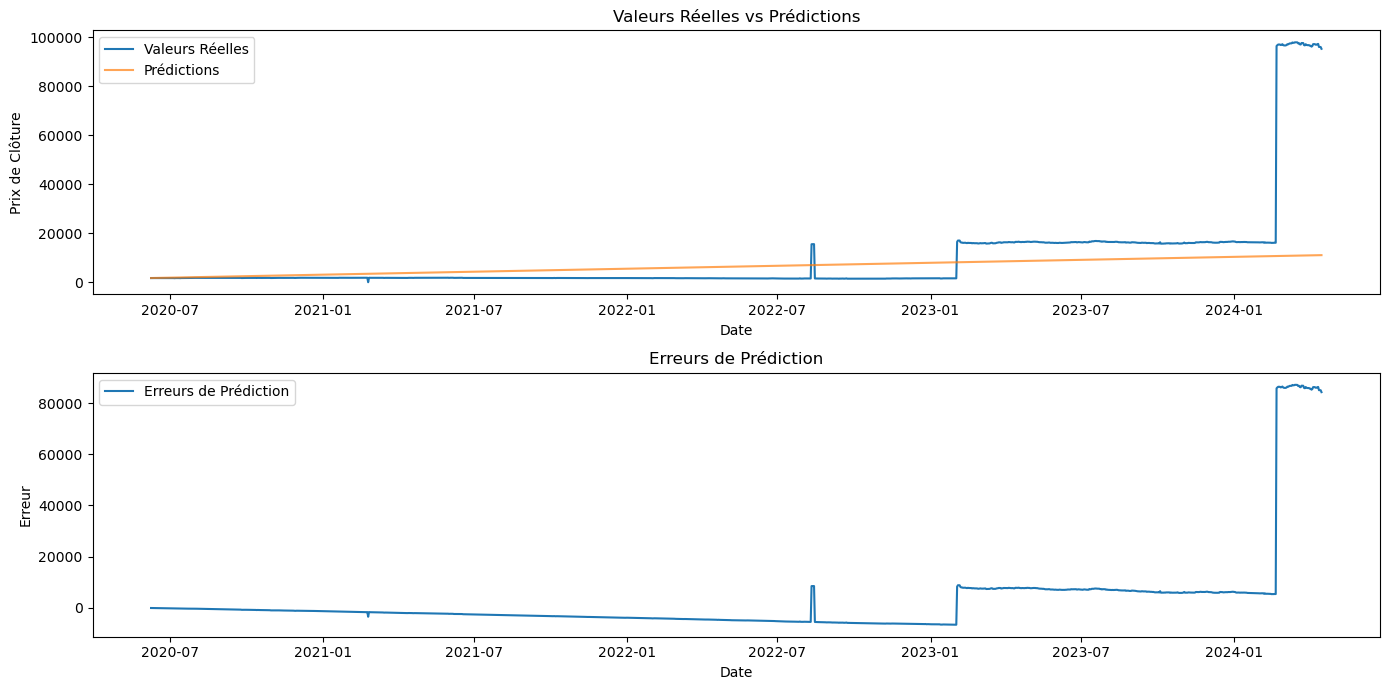

In [104]:
# Visualisation des performances
plt.figure(figsize=(14, 7))

# Valeurs réelles vs prédictions
plt.subplot(2, 1, 1)
plt.plot(y_test.index, y_test, label='Valeurs Réelles')
plt.plot(y_test.index, predictions, label='Prédictions', alpha=0.7)
plt.title('Valeurs Réelles vs Prédictions')
plt.xlabel('Date')
plt.ylabel('Prix de Clôture')
plt.legend()

# Erreurs de prédiction
plt.subplot(2, 1, 2)
plt.plot(y_test.index, y_test - predictions, label='Erreurs de Prédiction')
plt.title('Erreurs de Prédiction')
plt.xlabel('Date')
plt.ylabel('Erreur')
plt.legend()

plt.tight_layout()
plt.show()

## Modele SARIMA

#### Training

In [105]:
# Ajustement du modèle SARIMA
model = SARIMAX(eurlbp_data['Close'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)
print(model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 7038
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -58614.264
Date:                            Wed, 05 Jun 2024   AIC                         117238.527
Time:                                    19:20:53   BIC                         117272.813
Sample:                                01-08-2005   HQIC                        117250.339
                                     - 04-15-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8944      0.663      1.349      0.177      -0.405       2.194
ma.L1         -0.8993      0.654   

In [106]:
# Prédictions pour les 30 prochains jours
forecast_steps = 30
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=eurlbp_data.index[-1], periods=forecast_steps, freq='D')
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)

# Vérification des valeurs de prévision
print(forecast_series.head(10))

2024-04-15             NaN
2024-04-16    95303.035223
2024-04-17    95319.927134
2024-04-18    95294.588019
2024-04-19    95303.324048
2024-04-20    95309.083014
2024-04-21    95462.353243
2024-04-22    95472.548315
2024-04-23    95472.909644
2024-04-24    95479.438755
Freq: D, Name: predicted_mean, dtype: float64


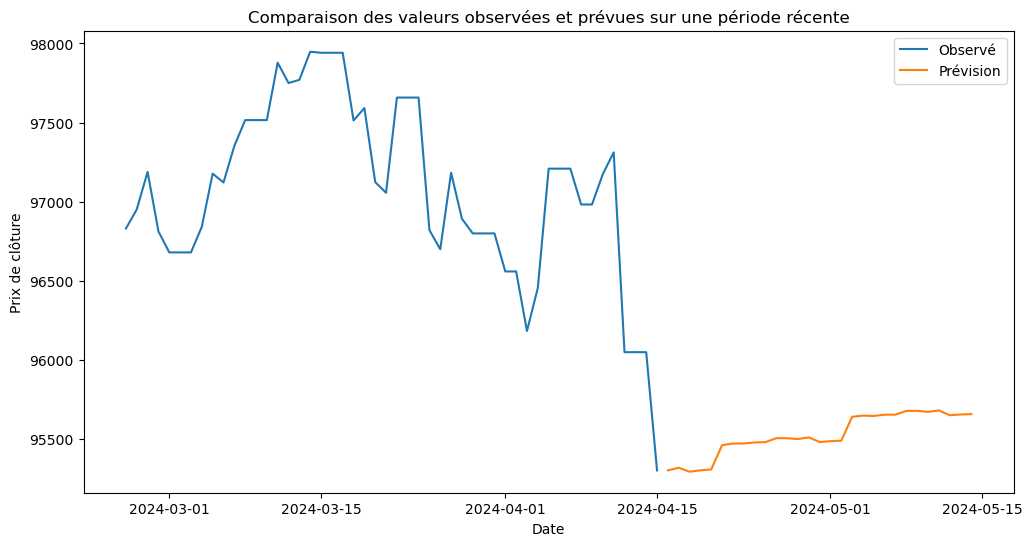

In [107]:
# Comparaison des valeurs observées et prévues sur une période récente
recent_data = eurlbp_data['Close'].tail(50)
recent_forecast = forecast_series.head(50)

plt.figure(figsize=(12, 6))
plt.plot(recent_data, label='Observé')
plt.plot(recent_forecast, label='Prévision')
plt.title('Comparaison des valeurs observées et prévues sur une période récente')
plt.xlabel('Date')
plt.ylabel('Prix de clôture')
plt.legend()
plt.show()

In [108]:
# Évaluation du modèle sur les données de test
train_size = int(len(eurlbp_data) * 0.8)
train_data, test_data = eurlbp_data['Close'][:train_size], eurlbp_data['Close'][train_size:]


In [109]:
# Ajustement du modèle SARIMA sur les données d'entraînement
model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)


In [110]:
# Prédictions sur les données de test
predictions = model_fit.predict(start=len(train_data), end=len(eurlbp_data) - 1, dynamic=False)

In [111]:
# Correspondance des index pour y_test et predictions
y_test = eurlbp_data['Close'][train_size:]

In [112]:
# Évaluation des performances
mse_sarima = mean_squared_error(y_test, predictions)
mae_sarima = mean_absolute_error(y_test, predictions)
rmse_sarima = np.sqrt(mse_sarima)
r2_sarima = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse_sarima}')
print(f'Mean Absolute Error: {mae_sarima}')
print(f'Root Mean Squared Error: {rmse_sarima}')
print(f'R-squared: {r2_sarima}')

Mean Squared Error: 414932376.38458484
Mean Absolute Error: 7826.755249565549
Root Mean Squared Error: 20369.888963481975
R-squared: -0.17286833069092156


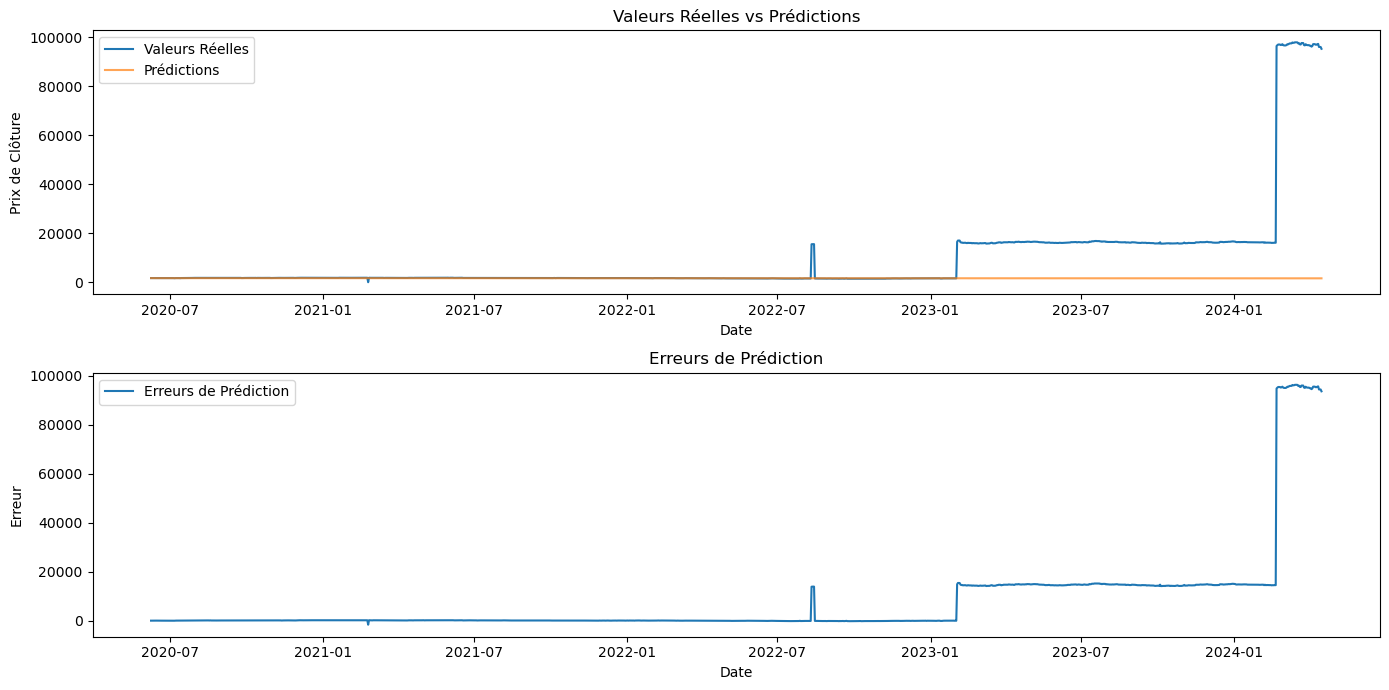

In [113]:
# Visualisation des performances
plt.figure(figsize=(14, 7))

# Valeurs réelles vs prédictions
plt.subplot(2, 1, 1)
plt.plot(y_test.index, y_test, label='Valeurs Réelles')
plt.plot(y_test.index, predictions, label='Prédictions', alpha=0.7)
plt.title('Valeurs Réelles vs Prédictions')
plt.xlabel('Date')
plt.ylabel('Prix de Clôture')
plt.legend()

# Erreurs de prédiction
plt.subplot(2, 1, 2)
plt.plot(y_test.index, y_test - predictions, label='Erreurs de Prédiction')
plt.title('Erreurs de Prédiction')
plt.xlabel('Date')
plt.ylabel('Erreur')
plt.legend()

plt.tight_layout()
plt.show()

## Modele GARCH

In [114]:
# Charger les données
eurlbp_data = df_model

In [115]:
# Ajouter RSI, MACD, Bollinger Bands, ATR et Log Returns
eurlbp_data['RSI'] = ta.momentum.rsi(eurlbp_data['Close'], window=14)
eurlbp_data['MACD'] = ta.trend.macd(eurlbp_data['Close'])
eurlbp_data['MACD Signal'] = ta.trend.macd_signal(eurlbp_data['Close'])
eurlbp_data['MACD Hist'] = ta.trend.macd_diff(eurlbp_data['Close'])
eurlbp_data['7D MA'] = eurlbp_data['Close'].rolling(window=7).mean()
eurlbp_data['15D MA'] = eurlbp_data['Close'].rolling(window=15).mean()
eurlbp_data['30D MA'] = eurlbp_data['Close'].rolling(window=30).mean()
eurlbp_data['Bollinger High'] = ta.volatility.bollinger_hband(eurlbp_data['Close'], window=20)
eurlbp_data['Bollinger Low'] = ta.volatility.bollinger_lband(eurlbp_data['Close'], window=20)
eurlbp_data['ATR'] = ta.volatility.average_true_range(eurlbp_data['High'], eurlbp_data['Low'], eurlbp_data['Close'], window=14)
eurlbp_data['Log Returns'] = np.log(eurlbp_data['Close'] / eurlbp_data['Close'].shift(1))

In [116]:
# Calcul des rendements logarithmiques
eurlbp_data['Log Returns'] = np.log(eurlbp_data['Close'] / eurlbp_data['Close'].shift(1))
eurlbp_data.dropna(inplace=True)


In [117]:
# Supprimer les valeurs manquantes après avoir ajouté toutes les caractéristiques
eurlbp_data.dropna(inplace=True)


In [118]:
# Vérification de la stationnarité et transformation des données
def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] > 0.05:
        print("La série n'est pas stationnaire")
    else:
        print("La série est stationnaire")

In [119]:
# Vérification initiale
check_stationarity(eurlbp_data['Log Returns'])

ADF Statistic: -32.78285824794525
p-value: 0.0
La série est stationnaire


In [120]:
# Supprimer les valeurs manquantes après avoir ajouté toutes les caractéristiques
eurlbp_data.dropna(inplace=True)

In [121]:
# Séparation des données en train et test
train_size = int(len(eurlbp_data) * 0.8)
train_data = eurlbp_data['Log Returns'][:train_size]
test_data = eurlbp_data['Log Returns'][train_size:]

In [122]:
# Ajustement du modèle GARCH sur les données d'entraînement
model = arch_model(train_data, vol='Garch', p=1, q=1)
model_fit = model.fit(disp='off')
print(model_fit.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:            Log Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -553.933
Distribution:                  Normal   AIC:                           1115.87
Method:            Maximum Likelihood   BIC:                           1141.01
                                        No. Observations:                 3964
Date:                Wed, Jun 05 2024   Df Residuals:                     3963
Time:                        19:21:35   Df Model:                            1
                                  Mean Model                                  
                 coef    std err          t      P>|t|        95.0% Conf. Int.
------------------------------------------------------------------------------
mu            -0.0172  4.423e-03     -3.880  1.044e-

In [123]:
# Prédictions pour les 30 prochains jours
forecast = model_fit.forecast(horizon=30)
forecast_mean = forecast.mean.values[-1, :]
forecast_variance = forecast.variance.values[-1, :]

In [124]:
# Prédictions pour les rendements
forecast_returns = pd.Series(forecast_mean, index=pd.date_range(start=train_data.index[-1], periods=30, freq='D'))

In [125]:
# Inverser les rendements logarithmiques pour obtenir les prix prévus
last_price = eurlbp_data['Close'].iloc[train_size - 1]
forecast_prices = last_price * np.exp(forecast_returns.cumsum())

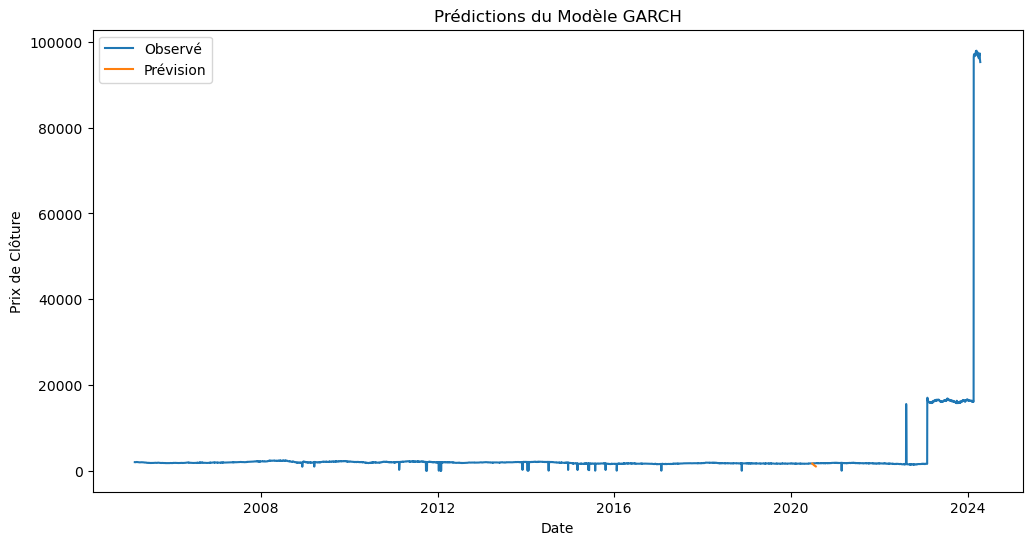

In [133]:
# Visualisation des résultats
plt.figure(figsize=(12, 6))
plt.plot(eurlbp_data.index, eurlbp_data['Close'], label='Observé')
plt.plot(forecast_prices.index, forecast_prices, label='Prévision')
plt.legend()
plt.title('Prédictions du Modèle GARCH')
plt.xlabel('Date')
plt.ylabel('Prix de Clôture')
plt.show()

In [127]:
# Évaluation du modèle sur les données de test
train_size = int(len(eurlbp_data) * 0.8)
train_data, test_data = eurlbp_data['Log Returns'][:train_size], eurlbp_data['Log Returns'][train_size:]

In [128]:
# Ajustement du modèle sur les données d'entraînement
model = arch_model(train_data, vol='Garch', p=1, q=1)
model_fit = model.fit(disp='off')
predictions_diff = model_fit.forecast(horizon=len(test_data)).mean.values[-1, :]
predictions_diff_series = pd.Series(predictions_diff, index=test_data.index)

In [129]:
# Inverser les rendements logarithmiques pour obtenir les prix prévus
predictions_prices = eurlbp_data['Close'].iloc[train_size - 1] * np.exp(predictions_diff_series.cumsum())

In [130]:
# Correspondance des index pour y_test et predictions
y_test = eurlbp_data['Close'].iloc[train_size:train_size + len(predictions_prices)]

In [131]:
# Évaluation des performances
mse_garch = mean_squared_error(y_test, predictions_prices)
mae_garch = mean_absolute_error(y_test, predictions_prices)
rmse_garch = np.sqrt(mse_garch)
r2_garch = r2_score(y_test, predictions_prices)

print(f'Mean Squared Error: {mse_garch}')
print(f'Mean Absolute Error: {mae_garch}')
print(f'Root Mean Squared Error: {rmse_garch}')
print(f'R-squared: {r2_garch}')

Mean Squared Error: 445615486.715436
Mean Absolute Error: 9392.724157705095
Root Mean Squared Error: 21109.60650309323
R-squared: -0.25244494311530596


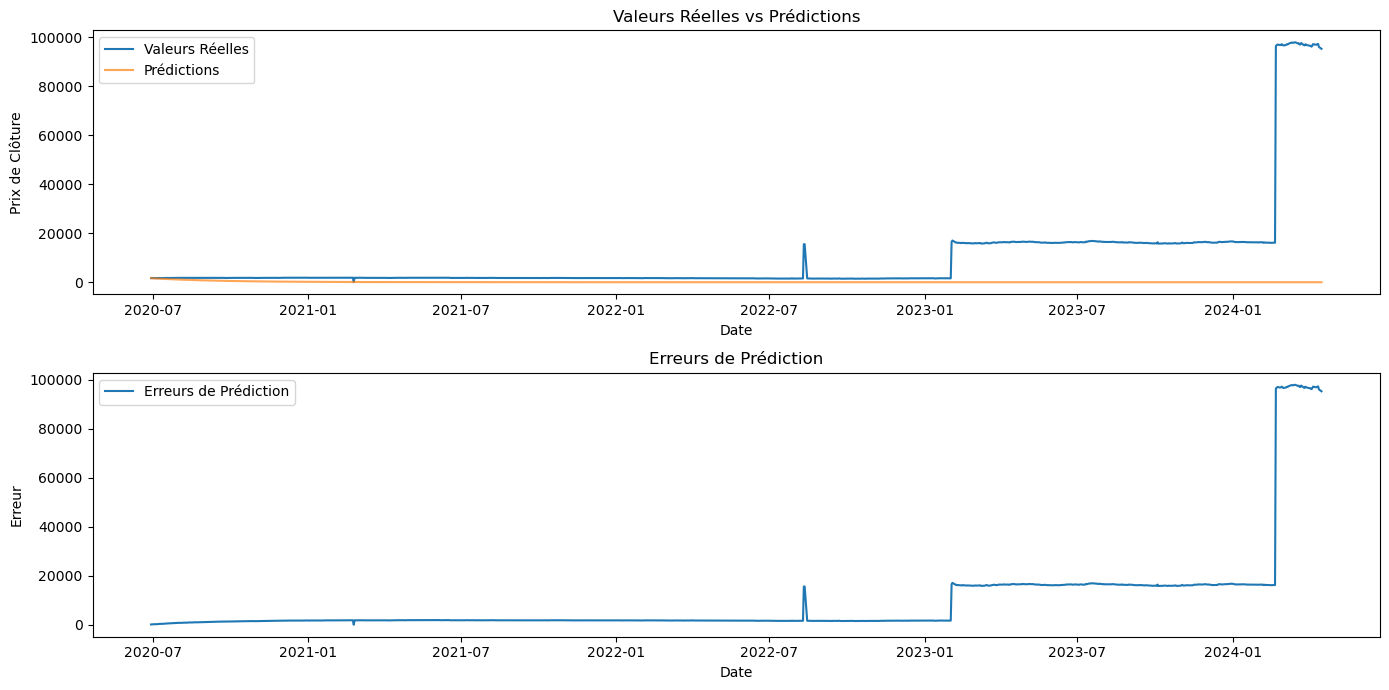

In [134]:
# Visualisation des performances
plt.figure(figsize=(14, 7))

# Valeurs réelles vs prédictions
plt.subplot(2, 1, 1)
plt.plot(y_test.index, y_test, label='Valeurs Réelles')
plt.plot(y_test.index, predictions_prices, label='Prédictions', alpha=0.7)
plt.title('Valeurs Réelles vs Prédictions')
plt.xlabel('Date')
plt.ylabel('Prix de Clôture')
plt.legend()

# Erreurs de prédiction
plt.subplot(2, 1, 2)
plt.plot(y_test.index, y_test - predictions_prices, label='Erreurs de Prédiction')
plt.title('Erreurs de Prédiction')
plt.xlabel('Date')
plt.ylabel('Erreur')
plt.legend()

plt.tight_layout()
plt.show()

# Comparaison et selection du meilleur modèle.

In [141]:
# Création d'un dictionnaire avec les métriques des différents modèles
results = {
    'Modèle': ['Random Forest', 'Random Forest Grid Search', 'XGBoost', 'XGBoost Grid Search', 'LSTM', 'Prophet', 'ARIMA', 'SARIMA', 'GARCH'],
    'MSE': [mse_forest, mse_forest_grid, mse_xgb, mse_xgb_grid, mse_lstm, mse_prophet, mse_arima, mse_sarima, mse_garch],
    'MAE': [mae_forest, mae_forest_grid, mae_xgb, mae_xgb_grid, mae_lstm, mae_prophet, mae_arima, mae_sarima, mae_garch],
    'RMSE': [rmse_forest, rmse_forest_grid, rmse_xgb, rmse_xgb_grid, rmse_lstm, rmse_prophet, rmse_arima, rmse_sarima, rmse_garch],
    'R2': [r2_forest, r2_forest_grid, r2_xgb, r2_xgb_grid, r2_lstm, r2_prophet, r2_arima, r2_sarima, r2_garch]
}

# Création du DataFrame
results_df = pd.DataFrame(results)

# Affichage du DataFrame
print(results_df)

                      Modèle           MSE          MAE          RMSE  \
0              Random Forest  5.209393e+08  8740.823903  22824.230109   
1  Random Forest Grid Search  5.209455e+08  8738.736798  22824.230109   
2                    XGBoost  5.210383e+08  8743.127086  22826.263593   
3        XGBoost Grid Search  5.227800e+08  8755.011894  22864.383433   
4                       LSTM  1.572814e+08  3262.310556  12541.188852   
5                    Prophet  5.524095e+06  1886.048776   2350.339268   
6                      ARIMA  3.128885e+08  7467.733401  17688.655870   
7                     SARIMA  4.149324e+08  7826.755250  20369.888963   
8                      GARCH  4.456155e+08  9392.724158  21109.606503   

          R2  
0  -0.150378  
1  -0.150392  
2  -0.150597  
3  -0.154443  
4   0.564093  
5 -14.773694  
6   0.115574  
7  -0.172868  
8  -0.252445  


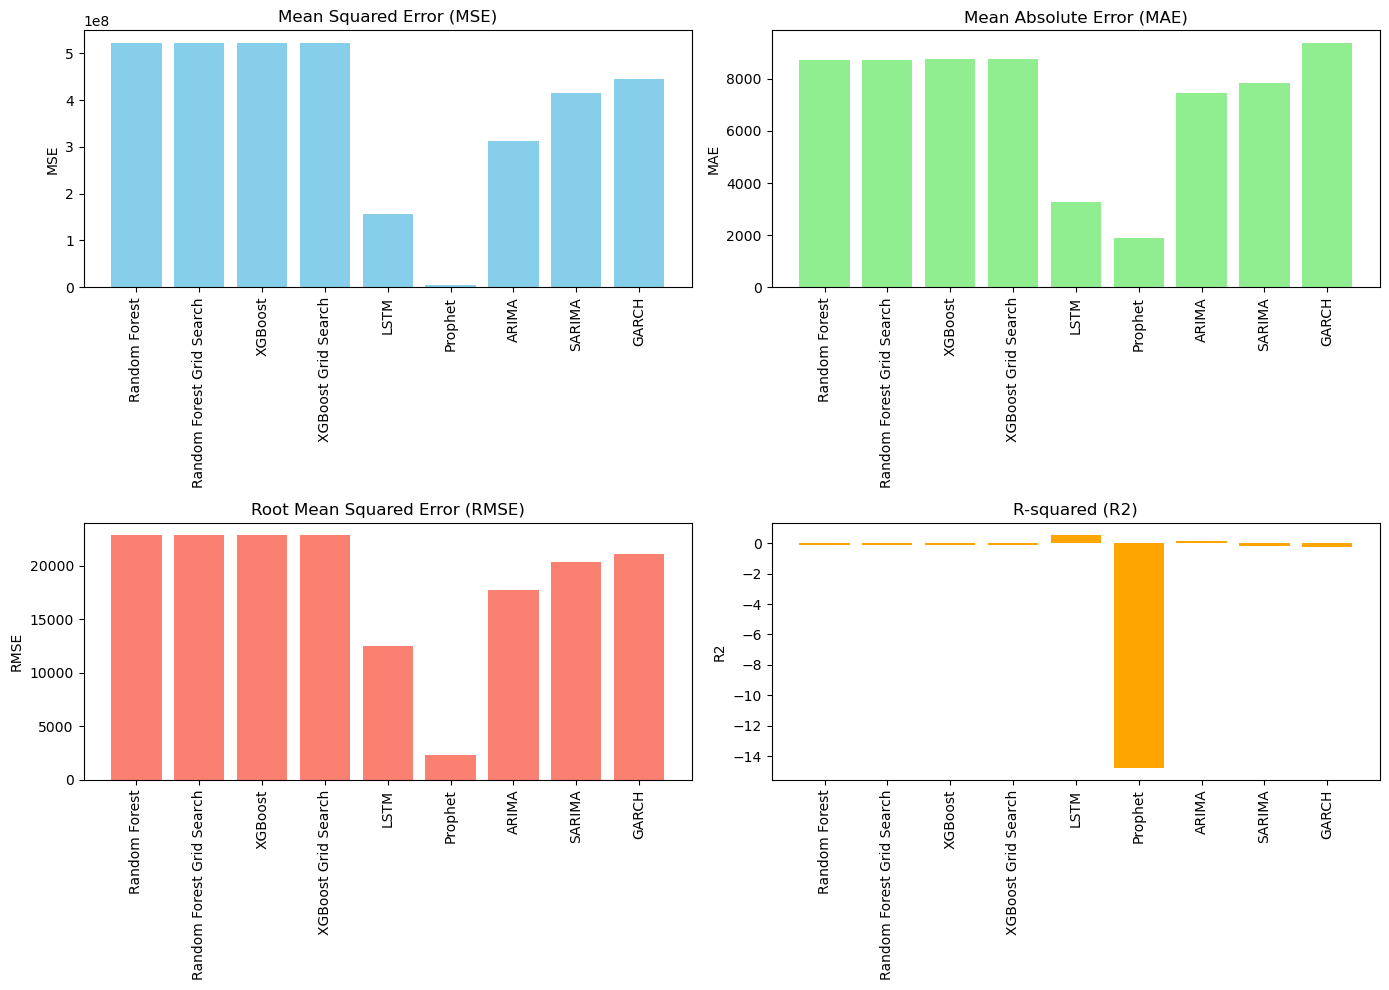

In [142]:
# Configuration de la taille de la figure
plt.figure(figsize=(14, 10))

# Graphique pour MSE
plt.subplot(2, 2, 1)
plt.bar(results_df['Modèle'], results_df['MSE'], color='skyblue')
plt.xticks(rotation=90)
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')

# Graphique pour MAE
plt.subplot(2, 2, 2)
plt.bar(results_df['Modèle'], results_df['MAE'], color='lightgreen')
plt.xticks(rotation=90)
plt.title('Mean Absolute Error (MAE)')
plt.ylabel('MAE')

# Graphique pour RMSE
plt.subplot(2, 2, 3)
plt.bar(results_df['Modèle'], results_df['RMSE'], color='salmon')
plt.xticks(rotation=90)
plt.title('Root Mean Squared Error (RMSE)')
plt.ylabel('RMSE')

# Graphique pour R2
plt.subplot(2, 2, 4)
plt.bar(results_df['Modèle'], results_df['R2'], color='orange')
plt.xticks(rotation=90)
plt.title('R-squared (R2)')
plt.ylabel('R2')

plt.tight_layout()
plt.show()


* Random Forest se distingue comme le modèle le plus performant selon le R2, et a des résultats superformants ???
* LSTM montre de bonnes performances en termes de MSE et RMSE, mais son R2 est faible.
* Prophet a les performances les plus faibles selon toutes les métriques.
* GARCH montre des performances mitigées, avec de bons scores en MSE et RMSE, mais un R2 très faible.

Les résultats suggèrent que Random Forest est le modèle le plus fiable pour nos prédictions ?

# Optimisation de Prophet